# Nondegenerate internal squeezing
### Workshop space for testing and misc. tasks
James Gardner, December 2021

Headings indicate different results, run all cells.

In [1]:
%load_ext autoreload
%autoreload 2

# imports interferometer class. also loads dependencies, e.g. numpy
from interferometer import *

%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({"font.size": 18})

### Checking that export from Mathematica worked

In [ ]:
# nIS, side-by-side N_S_NSR plot for publication (Fig. 3)
liIFO = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 0)
liIFO.plot_N_S_NSR_compact(
    [
        [0, *losses0, *signalRO],
        [0.75, *losses0, *signalRO],
        [0.85, *losses0, *signalRO],
        [0.95, *losses0, *signalRO],
        [0.986, *losses0, *signalRO],
    ],
    (2, 5e4, 300),
    show_legend="no sqz/nIS",
    color_List=(
        (0, 0, 1, 1),
        (1, 0, 0, 0.3),
        (1, 0, 0, 0.6),
        (1, 0, 0, 0.9),
        (1, 0, 0, 1),
    ),
    figsize=(12, 6),
    fmt_List=("", "--", "--", "--", ""),
    save_path="nIS_N_S_NSR_compact.pdf",
    width_ratios=[1, 1.5],
    extSqzFactor_List=(1, 1, 1, 1, 1),
)

In [ ]:
# fig 3 for paper
liIFO = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 0)

paramsList = [
    [0, *losses0, *signalRO],
    [0.75, *losses0, *signalRO],
    [0.85, *losses0, *signalRO],
    [0.95, *losses0, *signalRO],
    [0.986, *losses0, *signalRO],
]
freq_tuple = (2, 5e4, 300)
f_List = np.logspace(
    np.log10(freq_tuple[0]), np.log10(freq_tuple[1]), num=freq_tuple[2]
)

color_List = (
    (0, 0, 1, 1),
    (1, 0, 0, 0.3),
    (1, 0, 0, 0.6),
    (1, 0, 0, 0.9),
    (1, 0, 0, 1),
)
fmt_List = ("", "--", "--", "--", "")
save_path = "nIS_N_S_NSR_vertical.pdf"

plt.rcParams.update({"font.size": 12})
fig, axs = plt.subplots(
    3,
    1,
    sharex=True,
    figsize=(9 / cm_to_inch, 20 / cm_to_inch),
    gridspec_kw={"height_ratios": [2, 2, 3]},
)
plt.subplots_adjust(hspace=0.05)

num_curves = len(paramsList)

radiation_pressure_List = np.full(num_curves, True)
extSqzFactor_List = np.full(num_curves, 1)
wm_List = np.full(num_curves, 0)
psi3_List = np.full(num_curves, 0)

axs[0].axhline(0, color="grey", linewidth=1)

for i, params in enumerate(paramsList):
    axs[0].plot(
        f_List,
        20
        * np.log10(
            np.array(
                liIFO.noiseList_vs_freq(
                    params,
                    freq_tuple,
                    radiation_pressure_on=radiation_pressure_List[i],
                    extSqzFactor=extSqzFactor_List[i],
                    wm=wm_List[i],
                    psi3=psi3_List[i],
                )
            )
        ),
        fmt_List[i],
        color=color_List[i],
    )
    axs[1].loglog(
        f_List,
        liIFO.signalList_vs_freq(
            params,
            freq_tuple,
            radiation_pressure_on=radiation_pressure_List[i],
            extSqzFactor=extSqzFactor_List[i],
            wm=wm_List[i],
            psi3=psi3_List[i],
        ),
        fmt_List[i],
        color=color_List[i],
    )
    axs[2].loglog(
        f_List,
        liIFO.sensList_vs_freq(
            params,
            freq_tuple,
            radiation_pressure_on=radiation_pressure_List[i],
            extSqzFactor=extSqzFactor_List[i],
            wm=wm_List[i],
            psi3=psi3_List[i],
        ),
        fmt_List[i],
        color=color_List[i],
    )

axs[2].set_ylim((None, 1e-21))
axs[0].set_ylim((None, 40))
axs[2].set_xlim(freq_tuple[0], freq_tuple[1])
axs[2].set_xlabel("frequency, Hz")
axs[0].set_ylabel("quantum noise, dB")
axs[1].set_ylabel("signal response")
axs[2].set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")

from matplotlib.lines import Line2D

line1 = Line2D([0], [0], label="no squeezing", color="b")
line2 = Line2D([0], [0], label="nondegenerate\ninternal squeezing", color="r")
axs[2].legend(
    handles=[line1, line2],
    handlelength=1,
    frameon=False,
    borderpad=0,
    loc="upper center",
    bbox_to_anchor=(0.52, 1),
)

fig.savefig(save_path, bbox_inches="tight")
plt.close(fig)

In [ ]:
# IFO(lambda0, L_arm, L_SRC, P_circ, T_ITM, T_SRM, M, ws=None, gbR=None, gcR=None)
# aLIGO = IFO(1064e-9, 4e3, 56, 750e3, 0.014, 0.325, 40, None, None, 0)
# aLIGO.print_params()

liIFO = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 0)
# liIFO.print_params()

mech_freq = 1 - 1e-10  # 1Hz, shifted to avoid sampling pole
wm0 = 2 * pi * mech_freq

liIFO.plot_NSR_vs_freq(
    [
        [0, *losses0, *signalRO],
        [0.95, *losses0, *signalRO],
        [0.986, *losses0, *signalRO],
    ],
    (1e-1, 1e5, 100),
    ("off", "on", "thr", "lossy"),
    wm_List=[wm0, wm0, wm0],
    psi3_List=[0, 0, 0],
)  #'li2020_sigRO.pdf'

liIFO.plot_N_S_NSR(
    [
        [0, *losses0, *signalRO],
        [0.95, *losses0, *signalRO],
        [0.986, *losses0, *signalRO],
    ],
    (1e-1, 1e5, 100),
    ("off", "on", "thr", "lossy"),
    wm_List=[wm0, wm0, wm0],
    psi3_List=[0, 0, 0],
)  # , save_path='li2020_N_S_NSR_mechanical_frequency_1Hz.pdf')

### Checking idler readout and whether coherence is limited by detection loss

In [ ]:
# recovering idler variational readout
ifo = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 0, 2 * pi * 500)
phiPump_List = np.array([1, 2, 4, 6, 7]) * pi / 8
ifo.plot_NSR_vs_freq(
    [[xRatio0, *losses0, phiPump, pi / 2, pi / 2, pi / 2] for phiPump in phiPump_List],
    (1, 1e4, 100),
    np.concatenate(
        (
            [
                "{:g}$\pi/8$".format((pi / 2 - phiPump) * 8 / pi)
                for phiPump in phiPump_List
            ],
            ["$\psi_1-\phi$"],
        )
    ),
    "idlerRO_variational.pdf",
    False,
)

In [ ]:
# comparing to optimal filter plot
ifo = IFO(
    2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 2 * pi * 5
)
phiPump_List2 = np.array([4, 6, 7]) * pi / 8
labels2 = np.concatenate(
    (
        [
            "{:g}$\pi/8$".format((pi / 2 - phiPump) * 8 / pi)
            for phiPump in phiPump_List2
        ],
        ["$\psi_1-\phi$"],
    )
)

# realistic losses
freqtuple2 = (50, 3e3, 200)
ifo.plot_NSR_vs_freq(
    [
        [xRatio0, *losses0[:-1], 0.3, phiPump, pi / 2, pi / 2, pi / 2]
        for phiPump in phiPump_List2
    ],
    freqtuple2,
    labels2,
    save_path="idler_variation_validation_realistic_losses+30%_detection_loss.pdf",
)

# no detection loss
ifo.plot_NSR_vs_freq(
    [
        [xRatio0, *losses0[:-1], 0, phiPump, pi / 2, pi / 2, pi / 2]
        for phiPump in phiPump_List2
    ],
    freqtuple2,
    labels2,
    save_path="idler_variation_validation_realistic_losses+no_detection_loss.pdf",
)

# ~lossless
ifo.plot_NSR_vs_freq(
    [
        [xRatio0, *(1e-6, 1e-6, 1e-6, 0), phiPump, pi / 2, pi / 2, pi / 2]
        for phiPump in phiPump_List2
    ],
    freqtuple2,
    labels2,
    save_path="idler_variation_validation_approx_lossless.pdf",
)

# ~lossless + 30% detection loss
ifo.plot_NSR_vs_freq(
    [
        [xRatio0, *(1e-6, 1e-6, 1e-6, 0.3), phiPump, pi / 2, pi / 2, pi / 2]
        for phiPump in phiPump_List2
    ],
    freqtuple2,
    labels2,
    save_path="idler_variation_validation_approx_lossless+30%_detection_loss.pdf",
)

## Optimal filter using coherently combined readout

In [ ]:
# optimal filter for integrated sensitivity
# problems found later when freqList not saved with anglesList
ifo = IFO(
    2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 2 * pi * 5
)

num_samples = 100  # 300
freq_range = (30, 5e3)  # (50, 3e3) #(5, 2e4)
freq_tuple = (*freq_range, num_samples)
freq_List = np.logspace(
    np.log10(freq_range[0]), np.log10(freq_range[1]), num=num_samples
)

# adjust losses here, make sure to update file tag to not overwrite existing results
losses1, file_tag = ((0, 0, 0, 0), "lossless")  # (losses0, 'realistic_losses')
# losses1 = losses0 #(*losses0[:-1], 0) #(0,0,0,0) #(75e-6, 1000e-6, 100e-6, 0.1) #(0,0,0,0.1)
max_iter = 10
# file_tag = 'realistic_losses'#'detection_loss_only'#'lossless'#'realistic_losses_global_optim_maxiter={}_num_points=300'.format(max_iter)

# recover signal and idler comparison (manually for incoh)
def fn0(f):
    return ifo.ASDSh(f, xRatio0, *losses1, *signalRO)  # cannot pickle lambdas


def fn1(f):
    return ifo.ASDSh(f, xRatio0, *losses1, *idlerRO)


# parallel plotting
with Pool() as pool:
    res0_signal = pool.map(fn0, freq_List)
    res1_idler = pool.map(fn1, freq_List)
# incoherently combined readout
incoh = np.minimum(res0_signal, res1_idler)

data_set = np.empty((num_samples, 4))
data_set[:, 0], data_set[:, 1], data_set[:, 2], data_set[:, 3] = (
    freq_List,
    res0_signal,
    res1_idler,
    incoh,
)
np.save(
    "optimal_angles/data_sensitivity_comparison_curves--{}.npy".format(file_tag),
    data_set,
)

In [ ]:
# hack: optim angles at each point in sample, check cty later, maybe curvefit?
# skip this cell to avoid finding angles and just reload them from previous work
# creates angles.npy
bounds0 = ((0, 2 * pi), (0, 2 * pi), (0, 2 * pi))

# # local minimization
# from scipy.optimize import minimize
# global min_given_freq
# def min_given_freq(freq):
#     args0 = (freq, xRatio0, *losses1, pumpPhi0)
#     result = minimize(ifo.point_log_sens_given_angles, np.random.uniform(0, 2*pi, 3), args=args0, bounds=bounds0)
#     return result.x
# optim_fn = min_given_freq

# global minimization
from scipy.optimize import dual_annealing

global global_min_given_freq


def global_min_given_freq(freq):
    args0 = (freq, xRatio0, *losses1, pumpPhi0)
    result = dual_annealing(
        ifo.point_log_sens_given_angles, bounds=bounds0, args=args0, maxiter=max_iter
    )
    return result.x


optim_fn = global_min_given_freq

with Pool() as pool:
    angles_List = np.array(pool.map(optim_fn, freq_List))

save_path = "./optimal_angles/angles_and_freqs_{}.npy".format(file_tag)
angles_and_freq_list = np.empty((num_samples, 4))
angles_and_freq_list[:, 0] = freq_List
angles_and_freq_list[:, 1:] = angles_List
np.save(save_path, angles_and_freq_list)

In [ ]:
# plot sig, idler, incoh, and optimal together
load_path = "./optimal_angles/angles_and_freqs_{}.npy".format(file_tag)
angles_and_freq_list = np.load(load_path)
freq_List = angles_and_freq_list[:, 0]
angles_List = angles_and_freq_list[:, 1:]

save_path = "optimal_filter_{}.pdf".format(file_tag)
plot_title = file_tag.replace("_", " ")

plt.rcParams.update({"font.size": 18})
fig, axs = plt.subplots(
    4, 1, figsize=(8, 6), sharex=True, gridspec_kw={"height_ratios": [3, 1, 1, 1]}
)
plt.subplots_adjust(hspace=0.3)

axs[1].plot(
    freq_List, np.ones_like(freq_List) * pi / 2, "r", linewidth=3, label="$\pi/2$"
)
axs[1].plot(freq_List, np.ones_like(freq_List) * pi * 3 / 2, "r", linewidth=3)
axs[2].plot(
    freq_List,
    np.ones_like(freq_List) * pi / 2,
    color="orange",
    linewidth=3,
    label="$\phi$",
)
axs[2].plot(
    freq_List, np.ones_like(freq_List) * pi * 3 / 2, color="orange", linewidth=3
)
axs[3].plot(
    freq_List,
    np.transpose(np.array([np.full_like(freq_List, t) for t in (0, pi, 2 * pi)])),
    "r",
    linewidth=3,
    label="signal",
)
axs[3].plot(
    freq_List,
    np.transpose(np.array([np.full_like(freq_List, t) for t in (pi / 2, 3 / 2 * pi)])),
    linewidth=3,
    color="orange",
    label="idler",
)

wrapped_angles_List = np.empty_like(angles_List)
wrapped_angles_List[:, 0] = angles_List[:, 0] % (pi / 2)
wrapped_angles_List[:, 1] = angles_List[:, 1] % (pi / 2)
wrapped_angles_List[:, 2] = pi / 2 - abs((angles_List[:, 2] % pi) - pi / 2)
axs[1].plot(freq_List, wrapped_angles_List[:, 0], ".", label="$\psi_0'$")
axs[2].plot(freq_List, wrapped_angles_List[:, 1], ".", label="$\psi_1'$")
axs[3].plot(freq_List, wrapped_angles_List[:, 2], ".", label="$\psi_2'$")
axs[2].set_ylabel("angles\nwrapped for visualisation")
for i in range(1, len(axs)):
    axs[i].set_yticks(np.linspace(0, pi, 3))
    axs[i].set_yticklabels(["0", "$\dfrac{\pi}{2}$", "$\pi$"])
    axs[i].set_ylim(0, pi / 2)
    axs[i].set_xscale("log")
    axs[i].legend(fontsize=12)
    # remove duplicate labels
    handles, labels = axs[i].get_legend_handles_labels()
    by_label = dict(zip(labels[::-1], handles[::-1]))
    axs[i].legend(by_label.values(), by_label.keys(), fontsize=12)
axs[1].set_title("combining signal quadratures", fontsize=12)
axs[2].set_title("combining idler quadratures", fontsize=12)
axs[3].set_title("combining signal-idler modes", fontsize=12)
axs[0].set_title(plot_title, fontsize=12)

axs[0].loglog(freq_List, res0_signal, label="signal")
axs[0].loglog(freq_List, res1_idler, label="idler")
axs[0].loglog(freq_List, incoh, "--", label="incoh. combined")

# use hack results
params0 = (xRatio0, *losses1, pumpPhi0)


def psi(i, f):
    return angles_List[np.searchsorted(freq_List, f), i]


def sens_w_variationalRO(f):
    return ifo.ASDSh(f, *params0, psi(0, f), psi(1, f), psi(2, f))


with Pool() as pool:
    sens_varRO_List = np.array(pool.map(sens_w_variationalRO, freq_List))
    sens_and_freqs_list = np.empty((num_samples, 2))
    sens_and_freqs_list[:, 0] = freq_List
    sens_and_freqs_list[:, 1] = sens_varRO_List
    np.save("./optimal_angles/sens_and_freqs_{}".format(file_tag), sens_and_freqs_list)
    axs[0].loglog(freq_List, sens_varRO_List, "-", label="optimal filter")

axs[3].set_xlabel("frequency / Hz")
axs[0].set_ylabel("sensitivity / $\mathrm{Hz}^{-1/2}$")
axs[0].set_ylim(None, 1e-23)
axs[0].legend(fontsize=12)  # bbox_to_anchor=(2, 0.5)

plt.rcParams.update({"font.size": 12})
plt.show()
fig.savefig(save_path, bbox_inches="tight")
plt.close(fig)

To patch optimal filter results for paper

In [ ]:
# patching lower end with initial guess from previous runs
data1 = np.load('./optimal_angles/data_optimal_(freq,angles_complex,sens)--lossless_extSqz.npy')
data2 = np.load('./optimal_angles/data_optimal_(freq,angles_complex,sens)--lossless.npy')
initial_angles_array = data2[:,1:5]
ifo.save_optimal_filter(None, (0, 0, 0, 0), "lossless_extSqz_first15datapoints", extSqzFactor=1/10, skip_if_exists=False, max_iter=5, freq_List=freq_List[:15], initial_guess_array=initial_angles_array[:15])
data_patch = np.load('./optimal_angles/data_optimal_(freq,angles_complex,sens)--lossless_extSqz_first15datapoints.npy')
data1[:15] = data_patch
np.save('./optimal_angles/data_optimal_(freq,angles_complex,sens)--lossless_extSqz.npy', data1)

Other plots to understand optimal filter

In [ ]:
# total QN for optimal filter, check for squeezing
plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots()

ax.plot(
    freq_List,
    20 * np.log10(ifo.noiseList_vs_freq((xRatio0, *losses0, *signalRO), freq_tuple)),
    "b-",
    label="signal readout",
)
ax.plot(
    freq_List,
    20 * np.log10(ifo.noiseList_vs_freq((xRatio0, *losses0, *idlerRO), freq_tuple)),
    "-",
    color="orange",
    label="idler readout",
)


def QN_w_variationalRO(f):
    return ifo.ASDSx(f, *params0, psi(0, f), psi(1, f), psi(2, f))


with Pool() as pool:
    ax.plot(
        freq_List,
        20 * np.log10(pool.map(QN_w_variationalRO, freq_List)),
        "r-",
        label="optimal filter",
    )

ax.legend(loc="upper left")
ax.set_xscale("log")
ax.set_xlim(freq_range)
ax.set_ylim((None, 10))
ax.axhline(0, color="k", linewidth=1)
ax.set_xlabel("frequency / Hz")
ax.set_ylabel("quantum noise / dB")
plt.show()
fig.savefig("optimal_filter_quantum_noise_{}.pdf".format(file_tag), bbox_inches="tight")
plt.close()

# signal response for optimal filter
plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots()

ax.loglog(
    freq_List,
    ifo.signalList_vs_freq((xRatio0, *losses0, *signalRO), freq_tuple),
    "b-",
    label="signal readout",
)
ax.loglog(
    freq_List,
    ifo.signalList_vs_freq((xRatio0, *losses0, *idlerRO), freq_tuple),
    "-",
    color="orange",
    label="idler readout",
)


def sigT_w_variationalRO(f):
    return ifo.sigT(f, *params0, psi(0, f), psi(1, f), psi(2, f))


with Pool() as pool:
    ax.loglog(
        freq_List,
        pool.map(sigT_w_variationalRO, freq_List),
        "r-",
        label="optimal filter",
    )

ax.legend(loc="upper left")
ax.set_xlim(freq_range)
ax.set_xlabel("frequency / Hz")
ax.set_ylabel("signal response")
plt.show()
fig.savefig("optimal_filter_signal_{}.pdf".format(file_tag), bbox_inches="tight")
plt.close()

In [ ]:
# noise floor, want to validate that detection loss does not limit optimal readout (intra-cavity loss does presently)
# this was confirmed already by looking at variational readout with idler alone but it should be more obvious in QN

file_tag_List = [
    "realistic_losses",
    "intra-cavity_loss_only",
    "detection_loss_only",
    "lossless",
]
losses_List = [losses0, (*losses0[:-1], 0), (0, 0, 0, losses0[-1]), (0, 0, 0, 0)]
color_List = ["c", "m", "g", "brown"]

plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(
    freq_List,
    20 * np.log10(ifo.noiseList_vs_freq((xRatio0, *losses0, *signalRO), freq_tuple)),
    "r-",
    label="signal readout, lossy",
)
ax.plot(
    freq_List,
    20 * np.log10(ifo.noiseList_vs_freq((xRatio0, *losses0, *idlerRO), freq_tuple)),
    "-",
    color="orange",
    label="idler readout, lossy",
)

for i, file_tag in enumerate(file_tag_List):
    angles_and_freq_List = np.load(
        "./optimal_angles/angles_and_freqs_{}.npy".format(file_tag)
    )
    freq_List = angles_and_freq_List[:, 0]
    angles_List = angles_and_freq_List[:, 1:]

    def QN_w_variationalRO_2(f):
        def _psi(j, f_index):
            return angles_List[f_index, j]

        f_index = np.searchsorted(freq_List, f)
        return ifo.ASDSx(
            f,
            *(xRatio0, *losses_List[i], pumpPhi0),
            _psi(0, f_index),
            _psi(1, f_index),
            _psi(2, f_index)
        )

    with Pool() as pool:
        ax.plot(
            freq_List,
            20 * np.log10(pool.map(QN_w_variationalRO_2, freq_List)),
            "--",
            color=color_List[i],
            label=file_tag.replace("_", " "),
        )

ax.legend()
ax.set_xscale("log")
ax.axhline(0, color="k", linewidth=1)
ax.set_xlabel("frequency / Hz")
ax.set_ylabel("quantum noise / dB")
ax.set_xlim((30, 5e3))
# ax.set_xlim((30, 3e2+1e-10))
# ax.set_xticks([30, 50, 100, 300])
# ax.set_xticklabels([str(i) for i in [30, 50, 100, 300]])
plt.show()
fig.savefig("optimal_filter_noise_floor.pdf", bbox_inches="tight")
plt.close()

#### Optimal filter with complex coefficients when combining signal and idler

In [ ]:
# optimal filter using complex linear coefficient between modes, check theory for if this is possible
# goal: determine if is there extra sensitivity possible using complex coefficients
# optim angles (including psi3) at each point in sample
# psi0, psi1, psi2, psi3

# set-up cell
ifo = IFO(
    2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 2 * pi * 5
)

num_samples = 10  # 100
freq_range = (0.5, 40)  # (30, 5e3)
freq_tuple = (*freq_range, num_samples)
freq_List = np.logspace(
    np.log10(freq_range[0]), np.log10(freq_range[1]), num=num_samples
)
# added resolution near the two peaks, especially the kHz one
# num_samples = 100+20+40
# freq_List = np.sort(np.concatenate((freq_List,
#                np.logspace(np.log10(100), np.log10(200), num=20),
#                np.logspace(np.log10(1000), np.log10(3000), num=40))))

# adjust losses here, make sure to update file tag to not overwrite existing results
losses1, file_tag = (
    (0, 0, 0, 0),
    "lossless-LF",
)  # (losses0, 'realistic_losses') #((0,0,0,0), 'lossless')
max_iter = 20  # change to 20 to look better

In [ ]:
bounds1 = ((0, 2 * pi), (0, 2 * pi), (0, 2 * pi), (0, 2 * pi))
from scipy.optimize import dual_annealing

global global_min_w_complex_given_freq


def global_min_w_complex_given_freq(freq):
    args0 = (freq, xRatio0, *losses1, pumpPhi0)
    result = dual_annealing(
        ifo.point_log_sens_given_angles_complex,
        bounds=bounds1,
        args=args0,
        maxiter=max_iter,
    )
    return result.x


angles_complex_List = np.array(p_map(global_min_w_complex_given_freq, freq_List))

# sensitivity from angles complex
params0 = (xRatio0, *losses1, pumpPhi0)


def sens_w_variationalRO_complex(f):
    def _psi(i, freq_index):
        return angles_complex_List[freq_index, i]

    freq_index = np.searchsorted(freq_List, f)
    return ifo.ASDSh(
        f,
        *params0,
        _psi(0, freq_index),
        _psi(1, freq_index),
        _psi(2, freq_index),
        psi3=_psi(3, freq_index)
    )


sens_varRO_complex_List = np.array(p_map(sens_w_variationalRO_complex, freq_List))

data_set = np.empty((num_samples, 6))
data_set[:, 0], data_set[:, 1:5], data_set[:, 5] = (
    freq_List,
    angles_complex_List,
    sens_varRO_complex_List,
)
np.save(
    "./optimal_angles/data_freq_angles_complex_sens--{}.npy".format(file_tag), data_set
)

In [ ]:
data_set = np.load(
    "./optimal_angles/data_freq_angles_complex_sens--{}.npy".format(file_tag)
)
freq_List, angles_complex_List, sens_varRO_complex_List = (
    data_set[:, 0],
    data_set[:, 1:5],
    data_set[:, 5],
)

plt.rcParams.update({"font.size": 18})
fig, axs = plt.subplots(
    5, 1, figsize=(8, 8), sharex=True, gridspec_kw={"height_ratios": [3, 1, 1, 1, 1]}
)
plt.subplots_adjust(hspace=0.4)

# axs[0].plot(angles_complex_and_freq_list[:,0], sens...?)
axs[1].plot(
    freq_List,
    angles_complex_List[:, 0] % (pi / 2),
    ".",
    label=r"$\psi_0\;\mathrm{mod}\;\dfrac{\pi}{2}$",
)
axs[2].plot(
    freq_List,
    angles_complex_List[:, 1] % (pi / 2),
    ".",
    label=r"$\psi_1\;\mathrm{mod}\;\dfrac{\pi}{2}$",
)
psi2_wrapped = pi / 2 - abs((angles_complex_List[:, 2] % (pi)) - pi / 2)
axs[3].plot(
    freq_List,
    psi2_wrapped,
    ".",
    label=r"$\dfrac{\pi}{2} - \left|(\psi_2\;\mathrm{mod}\;\pi) - \dfrac{\pi}{2}\right|$",
)
axs[4].plot(
    freq_List,
    angles_complex_List[:, 3] % (pi / 2),
    ".",
    label=r"$\psi_3\;\mathrm{mod}\;\dfrac{\pi}{2}$",
)

for i in range(1, len(axs)):
    ymax = pi / 2
    axs[i].set_yticks(np.linspace(0, ymax, 3))
    axs[i].set_yticklabels(["0", "", "$\dfrac{\pi}{2}$"])
    axs[i].set_ylim(0, ymax)
    axs[i].set_xscale("log")
    axs[i].legend(fontsize=12)
subtitles_fontsize = 18
axs[0].set_title(file_tag.replace("_", " "), fontsize=subtitles_fontsize)
axs[1].set_title("combining signal quadratures", fontsize=subtitles_fontsize)
axs[2].set_title("combining idler quadratures", fontsize=subtitles_fontsize)
axs[3].set_title(
    "combining signal-idler modes - amplitude", fontsize=subtitles_fontsize
)
axs[4].set_title("combining signal-idler modes - phase", fontsize=subtitles_fontsize)
axs[2].set_ylabel("angles\nwrapped for visualisation")
axs[2].yaxis.set_label_coords(-0.1, -0.2)
axs[0].set_ylabel("sensitivity / $\mathrm{Hz}^{-1/2}$")
axs[4].set_xlabel("frequency / Hz")
axs[4].set_xscale("log")
axs[4].set_xlim(*freq_range)

axs[3].axhline(0, color="b", linewidth=3)
axs[3].axhline(pi / 2, color="orange", linewidth=3)

data_set = np.load(
    "./optimal_angles/data_sensitivity_comparison_curves--{}.npy".format(file_tag)
)
axs[0].loglog(data_set[:, 0], data_set[:, 1], color="b", label="signal")
axs[0].loglog(data_set[:, 0], data_set[:, 2], color="orange", label="idler")
axs[0].loglog(
    data_set[:, 0], data_set[:, 3], linestyle=(0, (5, 7)), color="c", label="incoherent"
)
axs[0].loglog(freq_List, sens_varRO_complex_List, "r-", label="optimal filter")
axs[0].legend(fontsize=14)
axs[0].set_ylim(None, 1e-23)

fig.savefig("optimal_complex_filter_{}.pdf".format(file_tag), bbox_inches="tight")
plt.show()
plt.close()

Comparison of optimal filters and SQL
(run this with set-up cell to generate plot)

In [ ]:
# optimal filter shows squeezing at 500Hz but does not cross over SQL line in lossy case
# to-do: derive SQL to check understanding
def SQL(f):
    return sqrt(8 * hbar / (ifo.M * (2 * pi * f) ** 2 * ifo.L_arm**2))


freq_tuple1 = (1, 1e4, 300)
freq_List1 = np.logspace(
    np.log10(freq_tuple1[0]), np.log10(freq_tuple1[1]), num=freq_tuple1[2]
)
with Pool() as pool:
    sql_List1 = pool.map(SQL, freq_List1)

losses2 = losses0
signalRO2 = ifo.sensList_vs_freq([xRatio0, *losses2, *signalRO], freq_tuple1)
idlerRO2 = ifo.sensList_vs_freq([xRatio0, *losses2, *idlerRO], freq_tuple1)

In [ ]:
# complex optimal filter plot for publication (Fig. 5)
plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots(figsize=(8, 6))
# don't use 'b' unless for no squeezing
ax.loglog(freq_List1, sql_List1, color="k", label="SQL")
# ax.loglog(freq_List1, np.minimum(signalRO2, idlerRO2), linewidth=3, color='k', label='incoherent envelope')
ax.fill_between(
    freq_List1,
    np.minimum(signalRO2, idlerRO2),
    1e-23,
    facecolor="whitesmoke",
    interpolate=True,
)
ax.loglog(freq_List1, signalRO2, color="turquoise", label="signal readout")
ax.loglog(freq_List1, idlerRO2, color="orange", label="idler readout")

complex_lossy = np.load(
    "./optimal_angles/data_freq_angles_complex_sens--realistic_losses.npy"
)
complex_lossless = np.load(
    "./optimal_angles/data_freq_angles_complex_sens--lossless.npy"
)
ax.loglog(complex_lossy[:, 0], complex_lossy[:, -1], "r", label="optimal filter")
ax.loglog(
    complex_lossless[:, 0],
    complex_lossless[:, -1],
    "r--",
    label="lossless optimal filter",
)

ax.set_ylim((1.5e-25, 1e-23))
ax.set_xlim((30, 5e3))
ax.set_xlabel("frequency, Hz")
ax.set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")

handles, labels = ax.get_legend_handles_labels()
leg_order = lambda x: [x[1], x[2], x[0], x[3], x[4]]
ax.legend(leg_order(handles), leg_order(labels), fontsize=16, ncol=2, columnspacing=1)

plt.show()
fig.savefig("optimal_filters_complex_only_and_SQL.pdf", bbox_inches="tight")
plt.close(fig)

### Splitting optimal readout plot into variational idler and signal readouts

In [ ]:
ifo = IFO(
    2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 2 * pi * 5
)
freq_tuple1 = (30, 5e3, 100)

In [ ]:
# variational idler
ifo.save_idler_varRO(freq_tuple1, losses0, "realistic_losses")
ifo.save_idler_varRO(freq_tuple1, (0, 0, 0, 0), "lossless")

In [ ]:
fixed_signalRO_list = ifo.sensList_vs_freq([xRatio0, *losses0, *signalRO], freq_tuple1)
fixed_signalRO_list_lossless = ifo.sensList_vs_freq(
    [xRatio0, *(0, 0, 0, 0), *signalRO], freq_tuple1
)

In [ ]:
# fig 5.1: fixed signal vs fixed idler vs variational idler RO
plt.rcParams.update({"font.size": 12})
cm_to_inch = 2.54
fig, ax = plt.subplots(figsize=(9 / cm_to_inch, 6 / cm_to_inch))  # columnwidth~=8.6 cm

# load and plot variational idler RO
var_idler_lossy = np.load(
    "./optimal_angles/data_idler_(freq,psi1,varSens,fixedSens)--realistic_losses.npy"
)
var_idler_lossless = np.load(
    "./optimal_angles/data_idler_(freq,psi1,varSens,fixedSens)--lossless.npy"
)
ax.loglog(
    var_idler_lossy[:, 0], var_idler_lossy[:, 3], color="orange", label="fixed idler"
)
ax.loglog(var_idler_lossy[:, 0], var_idler_lossy[:, 2], "r", label="variational idler")
ax.loglog(
    var_idler_lossless[:, 0],
    var_idler_lossless[:, 2],
    "r--",
    label="lossless variational\nidler",
)

ax.loglog(
    var_idler_lossy[:, 0], fixed_signalRO_list, color="turquoise", label="fixed signal"
)
ax.loglog(
    var_idler_lossy[:, 0],
    fixed_signalRO_list_lossless,
    "--",
    color="turquoise",
    label="lossless fixed\nsignal",
)
sql_list = ifo.sql_list_vs_freq(freq_tuple1)
ax.loglog(var_idler_lossy[:, 0], sql_list, ls="dotted", color="grey", label="SQL")

ax.set_ylim((3e-25, 1e-23))
ax.set_xlim(*freq_tuple1[:-1])
ax.set_xlabel("frequency, Hz")
ax.set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")

# frameon=False, borderpad=0,
ax.legend(
    fontsize=12,
    ncol=2,
    columnspacing=0.5,
    loc="lower center",
    bbox_to_anchor=(0.35, -0.9),
    handlelength=1,
)

# fig.tight_layout()
plt.show()
fig.savefig("idlerRO_fixed_vs_variational.pdf", bbox_inches="tight")
plt.close(fig)

In [ ]:
# idler mode only
# ifo =     IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2*pi*5000, 2*pi*500, 2*pi*5)
idler_ifo = IFO(
    2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 0, 2 * pi * 50000
)
idler_freq_tuple = (1, 1e4, 100)
# idler_ifo.plot_NSR_vs_freq([[xRatio0, *losses0, *idlerRO]], idler_freq_tuple)

In [ ]:
# save data for idler only
idler_ifo.save_idler_varRO(idler_freq_tuple, losses0, "realistic_losses--idler_only")
# idler_ifo.save_idler_varRO(idler_freq_tuple, (0,0,0,0), 'lossless--idler_only')
# --> lossless idler only has singularity threshold converge to zero which breaks the model
# idler_ifo.save_idler_varRO(idler_freq_tuple, (0,10e-6,10e-6,0), 'negligible_loss--idler_only')

In [ ]:
# idler readout side by side with idler only readout
# to-do: unify x axes to reduce confusion

plt.rcParams.update({"font.size": 18})
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
plt.subplots_adjust(wspace=0.15)

var_idler_lossy = np.load(
    "./optimal_angles/data_idler_(freq,psi1,varSens,fixedSens)--realistic_losses.npy"
)
var_idler_lossless = np.load(
    "./optimal_angles/data_idler_(freq,psi1,varSens,fixedSens)--lossless.npy"
)
ax1.loglog(
    var_idler_lossy[:, 0], var_idler_lossy[:, 3], color="orange", label="fixed idler"
)
ax1.loglog(var_idler_lossy[:, 0], var_idler_lossy[:, 2], "r", label="variational idler")
ax1.loglog(
    var_idler_lossless[:, 0],
    var_idler_lossless[:, 2],
    "r--",
    label="lossless variational idler",
)

ax1.set_title("$\gamma^b_R=500, \gamma^c_R=5 Hz$")
ax2.set_title("$\gamma^b_R=0, \gamma^c_R=50000 Hz$")

# idler only plot
var_idler_lossy = np.load(
    "./optimal_angles/data_idler_(freq,psi1,varSens,fixedSens)--realistic_losses--idler_only.npy"
)
ax2.loglog(
    var_idler_lossy[:, 0], var_idler_lossy[:, 3], color="orange", label="fixed idler"
)
ax2.loglog(var_idler_lossy[:, 0], var_idler_lossy[:, 2], "r", label="variational idler")

fixed_signalRO_list = ifo.sensList_vs_freq(
    [xRatio0, *losses0, *signalRO], idler_freq_tuple
)
ax1.loglog(
    var_idler_lossy[:, 0], fixed_signalRO_list, color="turquoise", label="fixed signal"
)
sql_list = ifo.sql_list_vs_freq(idler_freq_tuple)
ax1.loglog(var_idler_lossy[:, 0], sql_list, color="black", label="SQL")

# ax1.set_ylim((1.5e-25, 1e-23))
# ax1.set_xlim(*freq_tuple1[:-1])
ax1.set_xlim((1, 1e4))
ax1.set_xlabel("frequency, Hz")
ax1.set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")

ax1.legend(fontsize=16, ncol=1, columnspacing=1)

sql_list = idler_ifo.sql_list_vs_freq((1, 1e4, 10))
ax2.loglog(
    np.logspace(np.log10(1), np.log10(1e4), 10), sql_list, color="black", label="SQL"
)

ax2.set_xlim((1, 1e4))
# ax2.set_xlim(*freq_tuple1[:-1])
ax2.set_ylim((3e-25, 2e-22))
ax2.set_xlabel("frequency, Hz")
ax2.legend(fontsize=16, ncol=1, columnspacing=1, loc="upper center")

plt.show()
fig.savefig("idlerRO_sigRO_open_vs_idler_only.pdf", bbox_inches="tight")
plt.close(fig)

In [ ]:
"""something strange about only idler readout (when signal readout port closed) in the lossless limit
with no arm, idler, or detection loss, decreasing the signal SRC intra-cavity loss initially improves
sensitivity but then quickly degrades it
--> could just be seeing a strong version of: when losses are introduced they decrease peak and broaden sensitivity?"""
idler_ifo.plot_N_S_NSR_compact(
    [
        [xRatio0, *losses0, *idlerRO],
        [xRatio0, *(0, 1000e-6, 0, 0), *idlerRO],
        [xRatio0, *(0, 100e-6, 0, 0), *idlerRO],
        [xRatio0, *(0, 10e-6, 0, 0), *idlerRO],
        [xRatio0, *(0, 1e-6, 0, 0), *idlerRO],
    ],
    (0.5, 1e4, 300),
    save_path="idlerRO_only_sens_decreases_as_sigSRCloss_decreases.pdf",
    labels=[
        "realistic losses",
        "only 1000ppm signal loss",
        "only 100ppm sig. loss",
        "only 10ppm sig. loss",
        "only 1ppm sig. loss",
        "",
    ],
    suptitle="idlerRO only (sigRO port closed) - decreasing SRC loss decreases sensitivity",
    auto_xticks=False,
)

In [ ]:
# if the idler only readout rate is greatly increased, then the behaviour is still the same: losses broaden but decrease the peak
IFO(
    2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 0, 2 * pi * 50000
).plot_N_S_NSR_compact(
    [
        [xRatio0, *losses0, *idlerRO],
        [xRatio0, *(0, 1000e-6, 0, 0), *idlerRO],
        [xRatio0, *(0, 100e-6, 0, 0), *idlerRO],
        [xRatio0, *(0, 10e-6, 0, 0), *idlerRO],
    ],
    (0.5, 1e4, 100),
)

In [ ]:
# variational idler RO only improves QRPN and not the rest of the curve
fig, ax = plt.subplots(figsize=(6, 4))
ax.loglog(var_idler_lossy[:, 0], var_idler_lossy[:, 2], "r--", label="lossy - var")
ax.loglog(var_idler_lossy[:, 0], var_idler_lossy[:, 3], "r", label="lossy - fixed")

ax.loglog(
    var_idler_lossless[:, 0], var_idler_lossless[:, 2], "c--", label="lossless - var"
)
ax.loglog(
    var_idler_lossless[:, 0], var_idler_lossless[:, 3], "c", label="lossless - fixed"
)
ax.legend(ncol=2, fontsize=14)
plt.show()
fig.savefig("idlerRO_fixed_vs_variational_lossless.pdf")

In [ ]:
# variational signal
# ifo = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2*pi*5000, 2*pi*500, 2*pi*5)

freq_tuple1 = (30, 5e3, 100)
ifo.save_signal_varRO(freq_tuple1, losses0, "realistic_losses")
ifo.save_signal_varRO(freq_tuple1, (0, 0, 0, 0), "lossless")
ifo.save_signal_varRO(freq_tuple1, (75e-6, 1000e-6, 100e-6, 0.1), "optimistic_losses")
ifo.save_signal_varRO(freq_tuple1, (1e-6, 1e-6, 1e-6, 0.01e-2), "negligible_losses")
ifo.save_signal_varRO(freq_tuple1, (10e-6, 50e-6, 50e-6, 0.01e-2), "v_low_losses")

In [ ]:
# variational readout on signal does not improve above fixed readout for realistic losses (see angles in optimal filter?)
# surprising that it matters for idler, when the correlations (from sqz and ponderometric int.) should be roughly the same?

plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots(figsize=(8, 6))

# load and plot variational signal RO
var_signal_lossy = np.load(
    "./optimal_angles/data_signal_(freq,psi0,varSens,fixedSens)--realistic_losses.npy"
)
var_signal_lossless = np.load(
    "./optimal_angles/data_signal_(freq,psi0,varSens,fixedSens)--lossless.npy"
)
var_signal_lossy2 = np.load(
    "./optimal_angles/data_signal_(freq,psi0,varSens,fixedSens)--optimistic_losses.npy"
)
var_signal_lossy3 = np.load(
    "./optimal_angles/data_signal_(freq,psi0,varSens,fixedSens)--negligible_losses.npy"
)
var_signal_lossy4 = np.load(
    "./optimal_angles/data_signal_(freq,psi0,varSens,fixedSens)--v_low_losses.npy"
)

print(
    max(var_signal_lossless[:, 2] - var_signal_lossless[:, 3]),
    max(var_signal_lossy[:, 2] - var_signal_lossy[:, 3]),
    max(var_signal_lossy2[:, 2] - var_signal_lossy2[:, 3]),
    max(var_signal_lossy3[:, 2] - var_signal_lossy3[:, 3]),
    max(var_signal_lossy4[:, 2] - var_signal_lossy4[:, 3]),
)
# --> negligible difference using variationalRO for signal?

# fixed_signalRO_list = ifo.sensList_vs_freq([xRatio0, *losses0, *signalRO], freq_tuple1)
# ax.loglog(var_idler_lossy[:,0], fixed_signalRO_list, '-.', label='fixed signal')
ax.loglog(
    var_signal_lossy[:, 0],
    var_signal_lossy[:, 2],
    "",
    label="realistic variational signal",
)
ax.loglog(
    var_signal_lossy[:, 0],
    var_signal_lossy[:, 3],
    "k--",
    label="realistic fixed signal",
)
ax.loglog(
    var_signal_lossy2[:, 0],
    var_signal_lossy2[:, 2],
    "g",
    label="optimistic variational signal",
)
ax.loglog(
    var_signal_lossy2[:, 0],
    var_signal_lossy2[:, 3],
    "k--",
    label="optimistic fixed signal",
)
ax.loglog(
    var_signal_lossy4[:, 0],
    var_signal_lossy4[:, 2],
    "",
    label="v low variational signal",
)
ax.loglog(
    var_signal_lossy4[:, 0], var_signal_lossy4[:, 3], "k--", label="v low fixed signal"
)
ax.loglog(
    var_signal_lossy3[:, 0],
    var_signal_lossy3[:, 2],
    "m",
    label="negligible variational signal",
)
ax.loglog(
    var_signal_lossy3[:, 0],
    var_signal_lossy3[:, 3],
    "k--",
    label="negligible fixed signal",
)
ax.loglog(
    var_signal_lossless[:, 0],
    var_signal_lossless[:, 2],
    "c",
    label="lossless variational signal",
)
ax.loglog(
    var_signal_lossless[:, 0],
    var_signal_lossless[:, 3],
    "k--",
    label="lossless fixed signal",
)

sql_list = ifo.sql_list_vs_freq(freq_tuple1)
ax.loglog(var_signal_lossy[:, 0], sql_list, color="black", label="SQL")

ax.set_ylim((5e-25, 1e-23))
ax.set_xlim(*freq_tuple1[:-1])
ax.set_xlabel("frequency, Hz")
ax.set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")
ax.legend(fontsize=14, ncol=2, columnspacing=1)

plt.show()
fig.savefig("signalRO_fixed_vs_variational.pdf", bbox_inches="tight")
plt.close(fig)

In [ ]:
# angles of variational readout, left: psi0 (from pi/2) for signal, right: psi1 (from pi/2) for idler.
# signalRO does allow variation but the sensitivity doesn't improve? psi0=pi/2 optimises signal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

ax1.axhline(pi / 2, color="k", linewidth=1)
ax2.axhline(pi / 2, color="k", linewidth=1)

mod_angle = pi
ax1.plot(var_signal_lossy[:, 0], var_signal_lossy[:, 1] % mod_angle, label="realistic")
ax1.plot(
    var_signal_lossy2[:, 0], var_signal_lossy2[:, 1] % mod_angle, label="optimistic"
)
ax1.plot(var_signal_lossy4[:, 0], var_signal_lossy4[:, 1] % mod_angle, label="v low")
ax1.plot(
    var_signal_lossy3[:, 0], var_signal_lossy3[:, 1] % mod_angle, label="negligible"
)

ax2.plot(var_idler_lossy[:, 0], var_idler_lossy[:, 1] % mod_angle, label="realistic")
ax2.plot(
    var_idler_lossless[:, 0], var_idler_lossless[:, 1] % mod_angle, label="lossless"
)

ax1.set_xscale("log")
ax1.set_ylabel("$\psi_0\mathrm{mod}\pi/2$")
ax2.set_xscale("log")
ax2.set_ylabel("$\psi_1\mathrm{mod}\pi/2$")
ax1.set_ylim((0, mod_angle))
ax2.set_ylim((0, mod_angle))
ax1.legend(ncol=2, title="signal")
ax2.legend(title="idler")

plt.show()
fig.savefig("variational_angles.pdf")
plt.close(fig)

In [ ]:
# check that psi0 matters to signalRO at all --> it does!
losses2 = (0, 0, 0, 0)
freq_list = np.logspace(
    np.log10(freq_tuple1[0]), np.log10(freq_tuple1[1]), num=freq_tuple1[2]
)


def sens_list_given_psi0_const(psi0_const):
    psi0_list2 = np.full((freq_tuple1[2]), psi0_const)

    global sens_w_psi0_list2_given_f

    def sens_w_psi0_list2_given_f(f):
        f_index = np.searchsorted(freq_list, f)
        return ifo.ASDSh(f, xRatio0, *losses2, pumpPhi0, psi0_list2[f_index], pi / 2, 0)

    with Pool() as pool:
        return np.array(pool.map(sens_w_psi0_list2_given_f, freq_list))


psi0_list = [pi / 8, pi / 4, pi / 2, 3 * pi / 4, 7 * pi / 8]
for psi0 in psi0_list:
    plt.loglog(
        freq_list,
        sens_list_given_psi0_const(psi0),
        label="{:.2f}$\pi$".format(psi0 / pi),
    )

plt.loglog(
    var_signal_lossless[:, 0], var_signal_lossless[:, 2], "y--", label="variational"
)
plt.xlim((freq_tuple1[0], 100))
plt.legend()
plt.savefig("signalRO_variatiational_vs_different_fixed--lossless.pdf")
plt.show()

In [ ]:
losses2 = (0, 0, 0, 0)
freq_list = np.logspace(
    np.log10(freq_tuple1[0]), np.log10(freq_tuple1[1]), num=freq_tuple1[2]
)


def sens_list_given_psi1_const(psi1_const):
    psi1_list2 = np.full((freq_tuple1[2]), psi1_const)

    global sens_w_psi1_list2_given_f

    def sens_w_psi1_list2_given_f(f):
        f_index = np.searchsorted(freq_list, f)
        return ifo.ASDSh(f, xRatio0, *losses2, pumpPhi0, 0, psi1_list2[f_index], pi / 2)

    with Pool() as pool:
        return np.array(pool.map(sens_w_psi1_list2_given_f, freq_list))


psi1_list = np.linspace(0.01 * pi, pi / 2, 5)
for psi1 in psi1_list:
    plt.loglog(
        freq_list,
        sens_list_given_psi1_const(psi1),
        label="{:.2f}$\pi$".format(psi1 / pi),
    )

plt.loglog(
    var_idler_lossless[:, 0], var_idler_lossless[:, 2], "y--", label="variational"
)
plt.xlim((freq_tuple1[0], 200))
plt.legend()
plt.savefig("idlerRO_variatiational_vs_different_fixed--lossless.pdf")
plt.show()

In [ ]:
# fig 5.2: optimal vs variational sig and var idler RO
# for publication, removed lossless lines except for optimal
# as above, but split into lossy and lossless plots
plt.rcParams.update({"font.size": 18})
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

# load and plot variational signal RO
var_signal_lossy = np.load(
    "./optimal_angles/data_signal_(freq,psi0,varSens,fixedSens)--realistic_losses.npy"
)
var_signal_lossless = np.load(
    "./optimal_angles/data_signal_(freq,psi0,varSens,fixedSens)--lossless.npy"
)
ax1.loglog(
    var_signal_lossy[:, 0],
    var_signal_lossy[:, 2],
    color="turquoise",
    label="variational signal",
)
ax2.loglog(
    var_signal_lossless[:, 0],
    var_signal_lossless[:, 2],
    "",
    color="turquoise",
    label="lossless variational signal",
)

# load and plot variational idler RO
var_idler_lossy = np.load(
    "./optimal_angles/data_idler_(freq,psi1,varSens,fixedSens)--realistic_losses.npy"
)
var_idler_lossless = np.load(
    "./optimal_angles/data_idler_(freq,psi1,varSens,fixedSens)--lossless.npy"
)
ax1.loglog(var_idler_lossy[:, 0], var_idler_lossy[:, 2], "r", label="variational idler")
ax2.loglog(
    var_idler_lossless[:, 0],
    var_idler_lossless[:, 2],
    "r",
    label="lossless variational idler",
)
# var_idler_lossless2 =  np.load('./optimal_angles/data_idler_(freq,psi1,varSens,fixedSens)--lossless-LF.npy')
# ax2.loglog(var_idler_lossless2[:,0], var_idler_lossless2[:,2], 'r--', label='lossless variational idler')

# gentle shading
shade_color = "whitesmoke"
ax1.fill_between(
    var_signal_lossy[:, 0],
    np.minimum(var_signal_lossy[:, 2], var_idler_lossy[:, 2]),
    1e-23,
    facecolor=shade_color,
    interpolate=True,
)
ax2.fill_between(
    var_signal_lossless[:, 0],
    np.minimum(var_signal_lossless[:, 2], var_idler_lossless[:, 2]),
    1e-23,
    facecolor=shade_color,
    interpolate=True,
)

# load and plot optimal filter
complex_lossy = np.load(
    "./optimal_angles/data_freq_angles_complex_sens--realistic_losses.npy"
)
complex_lossless = np.load(
    "./optimal_angles/data_freq_angles_complex_sens--lossless.npy"
)
ax1.loglog(complex_lossy[:, 0], complex_lossy[:, -1], "m", label="optimal filter")
ax2.loglog(
    complex_lossless[:, 0],
    complex_lossless[:, -1],
    "m",
    label="lossless optimal filter",
)
# complex_lossless2 =  np.load('./optimal_angles/data_freq_angles_complex_sens--lossless-LF.npy')
# ax2.loglog(complex_lossless2[:,0], complex_lossless2[:,-1], 'm--', label='lossless optimal filter')

# # fixed idler
# ax1.loglog(var_idler_lossy[:,0], var_idler_lossy[:,3], color='orange', label='fixed idler')
# ax2.loglog(var_idler_lossless[:,0], var_idler_lossless[:,3], color='orange', label='lossless fixed idler')
# # optimal filter with no variational readout
# opt_no_var_lossy = np.load('./optimal_angles/data_optimal_no_var_(freq,psi2,psi3,sens)--realistic_losses.npy')
# opt_no_var_lossless = np.load('./optimal_angles/data_optimal_no_var_(freq,psi2,psi3,sens)--lossless.npy')
# ax1.loglog(opt_no_var_lossy[:,0], opt_no_var_lossy[:,-1], 'b--', label='optimal, no variational')
# ax2.loglog(opt_no_var_lossless[:,0], opt_no_var_lossless[:,-1], 'b--', label='optimal, no variational')

sql_list = ifo.sql_list_vs_freq((1, 5e3, 100))
ax1.loglog(
    np.logspace(np.log10(1), np.log10(5e3), 100),
    sql_list,
    ls="dotted",
    color="grey",
    label="SQL",
)
ax2.loglog(
    np.logspace(np.log10(1), np.log10(5e3), 100),
    sql_list,
    ls="dotted",
    color="grey",
    label="SQL",
)

ax1.set_ylim((1.5e-25, 1e-23))
ax1.set_xlim(*freq_tuple1[:-1])
ax1.set_xlabel("frequency, Hz")
ax1.set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")
ax2.set_xlim(*freq_tuple1[:-1])
ax2.set_xlabel("frequency, Hz")

ax1.set_title("lossy", fontsize=18)
ax2.set_title("lossless", fontsize=18)
ax1.legend(fontsize=18, ncol=1, columnspacing=1, frameon=False, borderpad=0)
plt.subplots_adjust(wspace=0.05)

plt.show()
# fig.savefig('optimal_filter_vs_variational_readouts_vs_optNoVar.pdf', bbox_inches='tight')
fig.savefig("optimal_filter_vs_variational_readouts--split.pdf", bbox_inches="tight")
plt.close(fig)

In [ ]:
# as above, but with optNoVar
plt.rcParams.update({"font.size": 18})
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
plt.subplots_adjust(wspace=0.05)

# variational signal RO
var_signal_lossy = np.load(
    "./optimal_angles/data_signal_(freq,psi0,varSens,fixedSens)--realistic_losses.npy"
)
var_signal_lossless = np.load(
    "./optimal_angles/data_signal_(freq,psi0,varSens,fixedSens)--lossless.npy"
)
ax1.loglog(
    var_signal_lossy[:, 0],
    var_signal_lossy[:, 2],
    color="turquoise",
    label="variational signal",
)
ax2.loglog(
    var_signal_lossless[:, 0],
    var_signal_lossless[:, 2],
    "",
    color="turquoise",
    label="lossless variational signal",
)

var_idler_lossy = np.load(
    "./optimal_angles/data_idler_(freq,psi1,varSens,fixedSens)--realistic_losses.npy"
)
var_idler_lossless = np.load(
    "./optimal_angles/data_idler_(freq,psi1,varSens,fixedSens)--lossless.npy"
)
# fixed idler
ax1.loglog(
    var_idler_lossy[:, 0], var_idler_lossy[:, 3], color="orange", label="fixed idler"
)
ax2.loglog(
    var_idler_lossless[:, 0],
    var_idler_lossless[:, 3],
    color="orange",
    label="lossless fixed idler",
)
# variational idler RO
ax1.loglog(var_idler_lossy[:, 0], var_idler_lossy[:, 2], "r", label="variational idler")
ax2.loglog(
    var_idler_lossless[:, 0],
    var_idler_lossless[:, 2],
    "r",
    label="lossless variational idler",
)

# gentle shading
shade_color = "whitesmoke"
ax1.fill_between(
    var_signal_lossy[:, 0],
    np.minimum(var_signal_lossy[:, 2], var_idler_lossy[:, 2]),
    1e-23,
    facecolor=shade_color,
    interpolate=True,
)
ax2.fill_between(
    var_signal_lossless[:, 0],
    np.minimum(var_signal_lossless[:, 2], var_idler_lossless[:, 2]),
    1e-23,
    facecolor=shade_color,
    interpolate=True,
)

# optimal filter with no variational readout
opt_no_var_lossy = np.load(
    "./optimal_angles/data_optimal_no_var_(freq,psi2,psi3,sens)--realistic_losses.npy"
)
opt_no_var_lossless = np.load(
    "./optimal_angles/data_optimal_no_var_(freq,psi2,psi3,sens)--lossless.npy"
)
ax1.loglog(
    opt_no_var_lossy[:, 0],
    opt_no_var_lossy[:, -1],
    "m",
    ls=(0, (5, 5)),
    label="optimal, no variation",
)
ax2.loglog(
    opt_no_var_lossless[:, 0],
    opt_no_var_lossless[:, -1],
    "m",
    ls=(0, (5, 5)),
    label="optimal, no variational",
)

# optimal filter
complex_lossy = np.load(
    "./optimal_angles/data_freq_angles_complex_sens--realistic_losses.npy"
)
complex_lossless = np.load(
    "./optimal_angles/data_freq_angles_complex_sens--lossless.npy"
)
ax1.loglog(
    complex_lossy[:, 0],
    complex_lossy[:, -1],
    "b",
    ls=(0.4, (5, 5)),
    label="optimal + variation",
)
ax2.loglog(
    complex_lossless[:, 0],
    complex_lossless[:, -1],
    "b",
    ls=(0.4, (5, 5)),
    label="lossless optimal filter",
)

sql_list = ifo.sql_list_vs_freq((1, 5e3, 100))
ax1.loglog(
    np.logspace(np.log10(1), np.log10(5e3), 100),
    sql_list,
    ls="dotted",
    color="grey",
    label="SQL",
)
ax2.loglog(
    np.logspace(np.log10(1), np.log10(5e3), 100),
    sql_list,
    ls="dotted",
    color="grey",
    label="SQL",
)

ax1.set_ylim((1.5e-25, 1e-23))
ax1.set_xlim(*freq_tuple1[:-1])
ax1.set_xlabel("frequency, Hz")
ax1.set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")
ax2.set_xlim(*freq_tuple1[:-1])
ax2.set_xlabel("frequency, Hz")

ax1.set_title("lossy", fontsize=18)
ax2.set_title("lossless", fontsize=18)
handles, labels = ax1.get_legend_handles_labels()

box = ax2.get_position()
# ax2.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, borderpad=0)
leg_order = lambda x: [x[1], x[2], x[0], x[-1], x[3], x[4]]
ax1.legend(
    leg_order(handles),
    leg_order(labels),
    loc="upper center",
    bbox_to_anchor=(0.9, -0.13),
    ncol=3,
    columnspacing=1,
    fontsize=16,
)
# fontsize=18, ncol=1, columnspacing=1


plt.show()
fig.savefig(
    "optimal_filter_vs_variational_readouts_vs_optNoVar.pdf", bbox_inches="tight"
)
plt.close(fig)

In [ ]:
# as above but vertically stacked
freq_tuple1 = (30, 5e3, 100)
plt.rcParams.update({"font.size": 12})
cm_to_inch = 2.54
fig, (ax1, ax2) = plt.subplots(
    2, 1, sharex=True, figsize=(9 / cm_to_inch, 12 / cm_to_inch)
)
plt.subplots_adjust(hspace=0.05)

# variational signal RO
var_signal_lossy = np.load(
    "./optimal_angles/data_signal_(freq,psi0,varSens,fixedSens)--realistic_losses.npy"
)
var_signal_lossless = np.load(
    "./optimal_angles/data_signal_(freq,psi0,varSens,fixedSens)--lossless.npy"
)
ax1.loglog(
    var_signal_lossy[:, 0],
    var_signal_lossy[:, 2],
    color="turquoise",
    label="variational signal",
)
ax2.loglog(
    var_signal_lossless[:, 0],
    var_signal_lossless[:, 2],
    "",
    color="turquoise",
    label="lossless variational signal",
)

var_idler_lossy = np.load(
    "./optimal_angles/data_idler_(freq,psi1,varSens,fixedSens)--realistic_losses.npy"
)
var_idler_lossless = np.load(
    "./optimal_angles/data_idler_(freq,psi1,varSens,fixedSens)--lossless.npy"
)
# fixed idler
ax1.loglog(
    var_idler_lossy[:, 0], var_idler_lossy[:, 3], color="orange", label="fixed idler"
)
ax2.loglog(
    var_idler_lossless[:, 0],
    var_idler_lossless[:, 3],
    color="orange",
    label="lossless fixed idler",
)
# variational idler RO
ax1.loglog(var_idler_lossy[:, 0], var_idler_lossy[:, 2], "r", label="variational idler")
ax2.loglog(
    var_idler_lossless[:, 0],
    var_idler_lossless[:, 2],
    "r",
    label="lossless variational idler",
)

# gentle shading
shade_color = "whitesmoke"
ax1.fill_between(
    var_signal_lossy[:, 0],
    np.minimum(var_signal_lossy[:, 2], var_idler_lossy[:, 2]),
    1e-23,
    facecolor=shade_color,
    interpolate=True,
)
ax2.fill_between(
    var_signal_lossless[:, 0],
    np.minimum(var_signal_lossless[:, 2], var_idler_lossless[:, 2]),
    1e-23,
    facecolor=shade_color,
    interpolate=True,
)

# optimal filter with no variational readout
opt_no_var_lossy = np.load(
    "./optimal_angles/data_optimal_no_var_(freq,psi2,psi3,sens)--realistic_losses.npy"
)
opt_no_var_lossless = np.load(
    "./optimal_angles/data_optimal_no_var_(freq,psi2,psi3,sens)--lossless.npy"
)
ax1.loglog(
    opt_no_var_lossy[:, 0],
    opt_no_var_lossy[:, -1],
    "m",
    linestyle=(0, (5, 5)),
    label="optimal only",
)
ax2.loglog(
    opt_no_var_lossless[:, 0],
    opt_no_var_lossless[:, -1],
    "m",
    linestyle=(0, (5, 5)),
    label="optimal, no variational",
)

# optimal filter
complex_lossy = np.load(
    "./optimal_angles/data_freq_angles_complex_sens--realistic_losses.npy"
)
complex_lossless = np.load(
    "./optimal_angles/data_freq_angles_complex_sens--lossless.npy"
)
ax1.loglog(
    complex_lossy[:, 0],
    complex_lossy[:, -1],
    "b",
    linestyle=(-3.3, (5, 5)),
    label="optimal\n+ variation",
)
ax2.loglog(
    complex_lossless[:, 0],
    complex_lossless[:, -1],
    "b",
    linestyle=(0.7, (5, 5)),
    label="lossless optimal filter",
)

sql_list = ifo.sql_list_vs_freq((1, 5e3, 100))
ax1.loglog(
    np.logspace(np.log10(1), np.log10(5e3), 100),
    sql_list,
    ls="dotted",
    color="grey",
    label="SQL",
)
ax2.loglog(
    np.logspace(np.log10(1), np.log10(5e3), 100),
    sql_list,
    ls="dotted",
    color="grey",
    label="SQL",
)

ax1.set_ylim((1.5e-25, 1e-23))
ax2.set_ylim((1.5e-25, 1e-23))
ax1.set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")
ax2.set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")
ax2.set_xlim(*freq_tuple1[:-1])
ax2.set_xlabel("frequency, Hz")

ax1.set_title("lossy", fontsize=12, y=1.0, pad=-12, style="italic")
ax2.set_title("lossless", fontsize=12, y=1.0, pad=-12, style="italic")
handles, labels = ax1.get_legend_handles_labels()

box = ax2.get_position()
# ax2.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, borderpad=0)
leg_order = lambda x: [x[1], x[2], x[0], x[-1], x[3], x[4]]

import matplotlib.lines as mlines

m_marker = mlines.Line2D([], [], color="m", linestyle="--")
b_marker = mlines.Line2D([], [], color="b", linestyle="--")
ax2.legend(
    (handles[1], handles[2], handles[0], handles[-1], m_marker, b_marker),
    leg_order(labels),
    loc="lower center",
    bbox_to_anchor=(0.35, -0.91),
    ncol=2,
    columnspacing=0.5,
    fontsize=12,
    handlelength=1,
)

plt.show()
fig.savefig(
    "optimal_filter_vs_variational_readouts_vs_optNoVar_vertical.pdf",
    bbox_inches="tight",
)
plt.close(fig)

In [ ]:
# examining signal and noise breakdown of variational idler RO: squeezing peak is what improves QRPN, signal just decreases
ifo.plot_N_S_NSR_compact(
    [
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 2, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 4, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 8, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 16, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 32, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 64, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 128, pi / 2],
    ],
    freq_tuple1,
    save_path="idlerRO_variational_N_S_NSR.pdf",
    labels=[*[f"$\pi/2^{{{i}}}$" for i in np.arange(1, 8)], "$\psi_1$"],
)

In [ ]:
# idler with psi1 increasing to pi doesn't show squeezing
ifo.plot_N_S_NSR_compact(
    [
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi - pi / 2, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi - pi / 4, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi - pi / 8, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi - pi / 16, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi - pi / 32, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi - pi / 64, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi - pi / 128, pi / 2],
    ],
    freq_tuple1,
    save_path="idlerRO_variational_N_S_NSR_increasing_psi1.pdf",
    labels=[*[f"$\pi(1-1/2^{{{i}}})$" for i in np.arange(1, 8)], "$\psi_1$"],
)

In [ ]:
# squeezer produces s-i but not s-s or i-i correlations, meaning that the variational RO must be using ponderometric
# i-i correlations coupled through from s-s at the test masses which therefore should vanish with rho=0
ifo.plot_N_S_NSR_compact(
    [
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 2, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 4, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 8, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 16, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 32, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 64, pi / 2],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, 0, pi / 128, pi / 2],
    ],
    freq_tuple1,
    save_path="idlerRO_variational_N_S_NSR_no_RP.pdf",
    labels=[*[f"$\pi/2^{{{i}}}$" for i in np.arange(1, 8)], "$\psi_1$"],
    radiation_pressure_List=np.full(8, False),
)

In [ ]:
# signal RO, result is similar if psi0 increases to pi
ifo.plot_N_S_NSR_compact(
    [
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, pi / 2, 0, 0],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, pi / 4, 0, 0],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, pi / 8, 0, 0],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, pi / 16, 0, 0],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, pi / 32, 0, 0],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, pi / 64, 0, 0],
        [xRatio0, *(0, 0, 0, 0), pumpPhi0, pi / 128, 0, 0],
    ],
    (10, 1e4, 100),
    save_path="signalRO_variational_N_S_NSR.pdf",
    labels=[*[f"$\pi/2^{{{i}}}$" for i in np.arange(1, 8)], "$\psi_0$"],
)

In [ ]:
# checking if sqz seen in conventional detector as claimed by MJ
ifo.plot_N_S_NSR_compact(
    [
        [0, *(0, 0, 0, 0), pumpPhi0, pi / 2, 0, 0],
        [0, *(0, 0, 0, 0), pumpPhi0, pi / 4, 0, 0],
        [0, *(0, 0, 0, 0), pumpPhi0, pi / 8, 0, 0],
        [0, *(0, 0, 0, 0), pumpPhi0, pi / 16, 0, 0],
        [0, *(0, 0, 0, 0), pumpPhi0, pi / 32, 0, 0],
        [0, *(0, 0, 0, 0), pumpPhi0, pi / 64, 0, 0],
        [0, *(0, 0, 0, 0), pumpPhi0, pi / 128, 0, 0],
    ],
    (0.1, 100, 200),
    save_path="conventional_signalRO_variational_N_S_NSR.pdf",
    labels=[*[f"$\pi/2^{{{i}}}$" for i in np.arange(1, 8)], "$\psi_0$"],
    auto_xticks=False,
    suptitle="conventional detector, variational signal readout, lossless",
    show_sql=True,
)

Ponderomotive correlations

In [ ]:
# plotting real part of correlations
freq_tuple2 = (30, 5e3, 100)

psi0_fixed = pi / 4  # not 0 or pi/2
# returns ASD without dB conversion, square to obtain PSD of S_X
sxcom_sig = (
    np.array(
        ifo.noiseList_vs_freq(
            [xRatio0, *losses0, pumpPhi0, psi0_fixed, 0, 0], freq_tuple2
        )
    )
    ** 2
)
sx11 = (
    np.array(ifo.noiseList_vs_freq([xRatio0, *losses0, pumpPhi0, 0, 0, 0], freq_tuple2))
    ** 2
)
sx22 = (
    np.array(
        ifo.noiseList_vs_freq([xRatio0, *losses0, pumpPhi0, pi / 2, 0, 0], freq_tuple2)
    )
    ** 2
)
reSx12 = (
    sxcom_sig - np.cos(psi0_fixed) ** 2 * sx11 - np.sin(psi0_fixed) ** 2 * sx22
) / np.sin(2 * psi0_fixed)

psi1_fixed = pi / 4
sxcom_idl = (
    np.array(
        ifo.noiseList_vs_freq(
            [xRatio0, *losses0, pumpPhi0, 0, psi1_fixed, pi / 2], freq_tuple2
        )
    )
    ** 2
)
sx33 = (
    np.array(
        ifo.noiseList_vs_freq([xRatio0, *losses0, pumpPhi0, 0, 0, pi / 2], freq_tuple2)
    )
    ** 2
)
sx44 = (
    np.array(
        ifo.noiseList_vs_freq(
            [xRatio0, *losses0, pumpPhi0, 0, pi / 2, pi / 2], freq_tuple2
        )
    )
    ** 2
)
reSx34 = (
    sxcom_idl - np.cos(psi1_fixed) ** 2 * sx33 - np.sin(psi1_fixed) ** 2 * sx44
) / np.sin(2 * psi1_fixed)

freq_list = np.logspace(
    np.log10(freq_tuple2[0]), np.log10(freq_tuple2[1]), num=freq_tuple2[2]
)

mindex = sxcom_idl.argmin()
print(
    freq_list[mindex],
    "\n",
    sx11[mindex],
    sx22[mindex],
    reSx12[mindex],
    sxcom_sig[mindex],
    "\n",
    sx33[mindex],
    sx44[mindex],
    reSx34[mindex],
    sxcom_idl[mindex],
)

In [ ]:
plt.rcParams.update({"font.size": 18})
fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0.05, wspace=0.25)

axs[0, 0].axhline(1, color="k", linewidth=1)
axs[0, 0].loglog(freq_list, sx11, label="$(S_X)_{1,1}$")
axs[0, 0].loglog(freq_list, sx22, "g", label="$(S_X)_{2,2}$")
axs[0, 0].loglog(
    freq_list, sxcom_sig, "r", label="$(S_X)_\mathrm{com}(\psi_0=\dfrac{\pi}{4})$"
)
axs[0, 0].legend(fontsize=14, loc="upper right")
axs[0, 0].set_ylim((0.7, 10))
axs[0, 0].set_yticks([1, 10])
axs[0, 0].set_yticklabels(["1", "10"])

axs[0, 1].axhline(1, color="k", linewidth=1)
axs[0, 1].loglog(freq_list, sx33, label="$(S_X)_{3,3}$")
axs[0, 1].loglog(freq_list, sx44, "g", label="$(S_X)_{4,4}$")
axs[0, 1].loglog(
    freq_list, sxcom_idl, "r", label="$(S_X)_\mathrm{com}(\psi_1=\dfrac{\pi}{4})$"
)
axs[0, 1].legend(fontsize=14, loc="upper right")
axs[0, 1].set_ylim((0.7, 10))
axs[0, 1].set_yticks([1, 10])
axs[0, 1].set_yticklabels(["1", "10"])

axs[1, 0].axhline(0, color="k", linewidth=1)
axs[1, 0].plot(freq_list, reSx12, "r", label="$\mathrm{Re}[(S_X)_{1,2}]$")
axs[1, 0].legend(fontsize=14, loc="upper right")
axs[1, 0].set_xscale("log")
axs[1, 0].set_xlabel("frequency, Hz")
# axs[1,0].set_ylim((None, 0.1))
axs[1, 0].set_ylim((-2, 1))

axs[1, 1].axhline(0, color="k", linewidth=1)
axs[1, 1].plot(freq_list, reSx34, "r", label="$\mathrm{Re}[(S_X)_{3,4}]$")
axs[1, 1].legend(fontsize=14, loc="upper right")
axs[1, 1].set_xscale("log")
axs[1, 1].set_xlabel("frequency, Hz")
axs[1, 1].set_ylim((-2, 1))

plt.show()
fig.savefig("correlations_real_part.pdf", bbox_inches="tight")
plt.close(fig)

Optimal readout tolerance to decoherence from detection optical loss

In [ ]:
ifo = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 0)
intra_losses0 = losses0[:-1]

max_Rpd = 0.8
Rpd_list = (0, 0.2, 0.4, 0.6)
Rpd_axis = np.linspace(0, max_Rpd, num=50)  # increase num samples once plot works
freq_tuple = (30, 5e3, 100)  # (2, 5e4, 300)
freq_list = np.logspace(
    np.log10(freq_tuple[0]), np.log10(freq_tuple[1]), num=freq_tuple[2]
)

In [ ]:
# replicating fig4 for optimal readout
for Rpd in Rpd_list:
    ifo.save_optimal_filter(
        freq_tuple,
        (*losses0[:-1], Rpd),
        "realistic_intras_{:.0f}%_detection".format(Rpd),
        max_iter=20,
    )


def optimal_dBsensList_probe_vs_Rpd(probe_freq, xRatio=xRatio0):
    global _sens_for_Rpd

    def _sens_for_Rpd(Rpd):
        return ifo.optimal_sens_given_freq(probe_freq, xRatio, (*intra_losses0, Rpd))

    return 20 * np.log10(p_map(_sens_for_Rpd, Rpd_axis) / _sens_for_Rpd(0))


freq_peak_detection_loss_0 = freq_list[opt_detection_loss_0[:, 5].argmin()]
np.save(
    "optimal_angles/optimal_dBsensList.npy",
    optimal_dBsensList_probe_vs_Rpd(freq_peak_detection_loss_0),
)

In [ ]:
# fig 5.3: tolerance of optimal readout
# --> how to compare to conventional if the idler readout rate is changing? comparison would be misleading?
# NB: these optimal filters use 0.95 threshold compared to fig4 which uses 0.986

plt.rcParams.update({"font.size": 18})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))

# optimal filter decoherence with detection loss --> peaks don't move, so can use hack in 2nd panel
common_path = (
    "optimal_angles/data_optimal_(freq,angles_complex,sens)--realistic_intras_"
)
linestyles1 = ["-", "--", "--", "--"]
c_list_red = [
    (1, 0, 0, 1),
    (1, 0, 0, 0.75),
    (1, 0, 0, 0.5),
    (1, 0, 0, 0.25),
]  # alt. use cm.Reds?

for i, Rpd in enumerate(Rpd_list):
    opt_detection_loss = np.load(
        common_path + "{:.0f}%_detection.npy".format(100 * Rpd)
    )
    ax1.loglog(
        opt_detection_loss[:, 0],
        opt_detection_loss[:, -1],
        linestyles1[i],
        color=c_list_red[i],
    )
    # Q: is the reduced tolerance at the signalRO peak due to the sensitivity of the correlations?
    # to-do: test by plotting fixed signalRO for the same losses, see if the curves converge

# conventional detector curves (no squeezing, signalRO) for same parameters (e.g. idler open)
paramsList = [*([0, *intra_losses0, Rpd, *signalRO] for Rpd in Rpd_list)]
c_list_blue = [(0, 0, 1, 1), (0, 0, 1, 0.75), (0, 0, 1, 0.5), (0, 0, 1, 0.25)]
freq_tuple1 = (1e3, 1e4, 200)
freq_list1 = np.logspace(
    np.log10(freq_tuple1[0]), np.log10(freq_tuple1[1]), num=freq_tuple1[2]
)
for i, params in enumerate(paramsList):
    ax1.loglog(
        freq_list1,
        ifo.sensList_vs_freq([*params], freq_tuple1),
        linestyles1[i],
        color=c_list_blue[i],
    )

ax1.set_xlabel("frequency, Hz")
ax1.set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")
ax1.set_xlim((freq_tuple[0], freq_tuple1[1]))
ax1.set_ylim((None, 1e-23))
ax1.set_xticks([1e2, 1e3, 1e4])
ax1.set_xticklabels(["100", "1000", "$10^4$"])
ax1.legend(
    [0, 20, 40, 60],
    title="detection loss, %",
    handlelength=1.15,
    ncol=1,
    columnspacing=1,
)

# horizontal lines at peaks
opt_detection_loss_0 = np.load(common_path + "0%_detection.npy")
hline_width = 1.5
# could minimise to find peak frequency, but this is close enough
freq_peak_detection_loss_0 = freq_list[opt_detection_loss_0[:, 5].argmin()]
sens_peak_detection_loss_0 = opt_detection_loss_0[:, 5].min()
ax1.hlines(
    sens_peak_detection_loss_0,
    freq_peak_detection_loss_0 / hline_width,
    freq_peak_detection_loss_0 * hline_width,
    colors="k",
)
ax1.hlines(
    ifo.ASDSh(5e3, 0, *intra_losses0, 0, *signalRO),
    5e3 / hline_width,
    5e3 * hline_width,
    colors="k",
)  # see Fig4 generation for minimisation, shortcutting here

# tolerance metric
dBsens_list = np.load("optimal_angles/optimal_dBsensList.npy")

from matplotlib import cm
from matplotlib.colors import ListedColormap

# overlaping line segments mean that alpha tricks are inadvisable
cmp_red = ListedColormap(
    np.column_stack(
        (np.ones(256), np.linspace(0, 1, 256), np.linspace(0, 1, 256), np.ones(256))
    )
)  # RGBA
# cmp_green = ListedColormap(np.column_stack((np.linspace(0, 1, 256), np.ones(256), np.linspace(0, 1, 256), np.ones(256))))
cmp_blue = ListedColormap(
    np.column_stack(
        (np.linspace(0, 1, 256), np.linspace(0, 1, 256), np.ones(256), np.ones(256))
    )
)
plot_coloured_line_segments(Rpd_axis, dBsens_list, Rpd_axis / max_Rpd, cmp_red, ax=ax2)

# load and plot conv. tolerance
def _dBsensList_probe_vs_Rpd(lossless_peak_freq, xRatio, extSqzFactor):
    global _sens_for_Rpd

    def _sens_for_Rpd(Rpd):
        return ifo.ASDSh(
            lossless_peak_freq,
            xRatio,
            *intra_losses0,
            Rpd,
            *signalRO,
            extSqzFactor=extSqzFactor
        )

    return 20 * np.log10(p_map(_sens_for_Rpd, Rpd_axis) / _sens_for_Rpd(0))


plot_coloured_line_segments(
    Rpd_axis, _dBsensList_probe_vs_Rpd(5e3, 0, 1), Rpd_axis / max_Rpd, cmp_blue, ax=ax2
)
# onion_data = np.load('data_of_tolerance_to_detection_loss/tolerance_(Rpd,conv,ext,nIS,ext+nIS).npy')
# plot_coloured_line_segments(onion_data[:,0], onion_data[:,1], onion_data[:,0]/max(onion_data[:,0]), cmp_blue, ax=ax2)

# ax2.scatter(Rpd_axis, dBsens_list, c=cmp_red(np.abs(Rpd_axis/np.max(Rpd_axis))), edgecolor='none', marker='.')
ax2.set_xlabel("detection loss, $\%$")
ax2.set_ylabel("reduction in peak sensitivity, dB")
ax2.set_xticks(np.arange(0, max_Rpd + 0.2, step=0.2))
ax2.set_xticklabels(
    ("{:.0f}".format(i) for i in np.arange(0, 100 * (max_Rpd + 0.2), step=20))
)
ax2.set_xlim(0, max_Rpd)
ax2.set_ylim(0, 7.5)

import matplotlib.lines as mlines

blue_marker = mlines.Line2D([], [], color="b", label="no squeezing")
red_marker = mlines.Line2D([], [], color="r", label="optimal readout")
ax2.legend(handles=[blue_marker, red_marker], handlelength=1.15)

fig.align_xlabels()
plt.show()
fig.savefig("optimalRO_tolerance_to_detection_loss.pdf", bbox_inches="tight")
plt.close(fig)

In [ ]:
# optimal filter without variational readout
# ifo = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2*pi*5000, 2*pi*500, 2*pi*5)
# freq_tuple1 = (30, 5e3, 100)
ifo.save_optimal_filter_no_variational(freq_tuple1, losses0, "realistic_losses")
ifo.save_optimal_filter_no_variational(freq_tuple1, (0, 0, 0, 0), "lossless")

## Tolerance to detection loss

In [ ]:
# tolerance to detection loss
liIFO = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 0)

# intra_losses = (0,0,0)
intra_losses = losses0[:-1]

In [ ]:
# tolerance to detection loss: no sqz., external sqz., nondeg. int. sqz.
# NB: high level of squeezing not used later on
intra_losses1 = losses0[:-1]
liIFO.plot_NSR_vs_freq(
    [
        [0, *intra_losses1, 0, *signalRO],
        [0, *intra_losses1, 0.3, *signalRO],
        [0, *intra_losses1, 0, *signalRO],
        [0, *intra_losses1, 0.3, *signalRO],
        [0.986, *intra_losses1, 0, *signalRO],
        [0.986, *intra_losses1, 0.3, *signalRO],
        [0.986, *intra_losses1, 0, *signalRO],
        [0.986, *intra_losses1, 0.3, *signalRO],
    ],
    (500, 1e4, 200),
    fmt_List=["b", "b--", "c", "c--", "r", "r--", "m", "m--"],
    labels=[
        "none, 0%",
        "none, 30%",
        "external, 0%",
        "external, 30%",
        "nondeg. internal, 0%",
        "nondeg. internal, 30%",
        "nondeg. internal + external, 0%",
        "nondeg. internal + external, 30%",
        "squeezing, detection loss\n(with intra-cavity losses)",
    ],
    extSqzFactor_List=[1, 1, 1 / 10, 1 / 10, 1, 1, 1 / 10, 1 / 10],
    figsize=(8, 6),
    save_path="nIS_tolerance_to_detection_loss_w_intra_losses.pdf",
)

In [ ]:
intra_losses1 = (0, 0, 0)
liIFO.plot_NSR_vs_freq(
    [
        [0, *intra_losses1, 0, *signalRO],
        [0, *intra_losses1, 0.3, *signalRO],
        [0, *intra_losses1, 0, *signalRO],
        [0, *intra_losses1, 0.3, *signalRO],
        [0.986, *intra_losses1, 0, *signalRO],
        [0.986, *intra_losses1, 0.3, *signalRO],
    ],
    (500, 1e4, 200),
    fmt_List=["b", "b--", "c", "c--", "r", "r--"],
    labels=[
        "none, 0%",
        "none, 30%",
        "external, 0%",
        "external, 30%",
        "nondeg. internal, 0%",
        "nondeg. internal, 30%",
        "squeezing, detection loss\n(no intra-cavity losses)",
    ],
    extSqzFactor_List=[1, 1, 1 / 10, 1 / 10, 1, 1, 1 / 10, 1 / 10],
    figsize=(8, 6),
    save_path="nIS_tolerance_to_detection_loss_no_intra_losses.pdf",
)

In [ ]:
# peak sensitivity in dB versus detection loss
from scipy.optimize import minimize
from scipy.optimize import basinhopping

num_samples = 100
max_Rpd = 0.8
Rpd_List = np.linspace(0, max_Rpd, num=num_samples)


def log_sens_given_f_singleton(f_arr, *args):
    return np.log10(liIFO.ASDSh(f_arr[0], *args, extSqzFactor=extSqzFactor1))


# global peak_sens_given_Rpd
def peak_sens_given_Rpd(
    Rpd, full_result=False, x0=np.random.uniform(100, 1000, 1), xRatio=xRatio0
):
    # find peak
    # all intra-cavity losses are zero --> no amplification of noise (why?)
    args0 = (xRatio, *intra_losses, Rpd, *signalRO)
    #     bounds0 = ((1, 1e5),)
    bounds0 = ((1e2, 1e4),)

    result = minimize(
        log_sens_given_f_singleton,
        x0,
        args=args0,
        bounds=bounds0,
        options={"maxiter": 10},
    )

    #     minimizer_kwargs = dict(args=args0, bounds=bounds0, method="L-BFGS-B")
    #     result = basinhopping(log_sens_given_f_singleton, x0, minimizer_kwargs=minimizer_kwargs)

    peak_sens = 10**result.fun  # undo log10
    if full_result:
        return result
    else:
        return peak_sens


def sens_List_given_x0(x0):  # , no_dB=True):
    """lossless means w/o Rpd, but with other realistic losses"""
    no_det_loss_result = peak_sens_given_Rpd(0, full_result=True, x0=x0, xRatio=xRatio1)
    global no_det_loss_freq
    no_det_loss_freq = (no_det_loss_result.x)[0]
    global no_det_loss_peak
    no_det_loss_peak = 10**no_det_loss_result.fun

    # if no_dB:
    global _peak_sens

    def _peak_sens(Rpd):
        return peak_sens_given_Rpd(Rpd, x0=no_det_loss_freq, xRatio=xRatio1)

    with Pool() as pool:
        return pool.map(_peak_sens, Rpd_List)

In [ ]:
# peak sens vs Rpd
# no sqz
xRatio1 = 0
extSqzFactor1 = 1
sens_List_no_sqz = sens_List_given_x0([5000])
dBsens_List_no_sqz = 20 * np.log10(sens_List_no_sqz / no_det_loss_peak)

# ext sqz
xRatio1 = 0
extSqzFactor1 = 1 / 10
sens_List_ext_sqz = sens_List_given_x0([5000])
dBsens_List_ext_sqz = 20 * np.log10(sens_List_ext_sqz / no_det_loss_peak)

# nIS
xRatio1 = 0.986
extSqzFactor1 = 1
sens_List = sens_List_given_x0([1600])
dBsens_List = 20 * np.log10(sens_List / no_det_loss_peak)

# nIS + ext sqz
xRatio1 = 0.986
extSqzFactor1 = 1 / 10
sens_List_nIS_and_ext_sqz = sens_List_given_x0([1600])
dBsens_List_nIS_and_ext_sqz = 20 * np.log10(
    sens_List_nIS_and_ext_sqz / no_det_loss_peak
)

In [ ]:
np.save("data_of_tolerance_to_detection_loss/nIS_Rpd_List.npy", Rpd_List)
np.save(
    "data_of_tolerance_to_detection_loss/nIS_dBsens_List_no_sqz.npy", dBsens_List_no_sqz
)
np.save(
    "data_of_tolerance_to_detection_loss/nIS_dBsens_List_ext_sqz.npy",
    dBsens_List_ext_sqz,
)
np.save("data_of_tolerance_to_detection_loss/nIS_dBsens_List.npy", dBsens_List)
np.save(
    "data_of_tolerance_to_detection_loss/nIS_dBsens_List_nIS_and_ext_sqz.npy",
    dBsens_List_nIS_and_ext_sqz,
)

In [ ]:
# plotting
plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(Rpd_List, sens_List_no_sqz, "b-", label="no sqz.")
ax.plot(Rpd_List, sens_List_ext_sqz, "c-", label="ext. sqz. (ES)")
ax.plot(Rpd_List, sens_List, "r-", label="ND int. sqz. (nIS)")
ax.plot(Rpd_List, sens_List_nIS_and_ext_sqz, "m-", label="nIS and ES")
ax.set_xlabel("detection loss / $\%$")
ax.set_ylabel("peak sensitivity (NSR) / $\mathrm{Hz}^{-1/2}$")
ax.set_xticks(np.arange(0, max_Rpd + 0.2, step=0.2))
ax.set_xticklabels(
    ("{:.0f}".format(i) for i in np.arange(0, 100 * (max_Rpd + 0.2), step=20))
)
ax.set_xlim(0, max_Rpd)
ax.set_yscale("log")
ax.legend()
plt.show()
# fig.savefig('peak_sens_vs_detection_loss_no_dB_no_intra-cavity_losses.pdf', bbox_inches = "tight")
fig.savefig(
    "peak_sens_vs_detection_loss_no_dB_w_intra-cavity_losses.pdf", bbox_inches="tight"
)
plt.close(fig)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(Rpd_List, dBsens_List_no_sqz, "b-", label="no sqz.")
ax.plot(Rpd_List, dBsens_List_ext_sqz, "c-", label="ext. sqz. (ES)")
ax.plot(Rpd_List, dBsens_List, "r-", label="ND int. sqz. (nIS)")
ax.plot(Rpd_List, dBsens_List_nIS_and_ext_sqz, "m-", label="nIS and ES")
ax.set_xlabel("detection loss / $\%$")
ax.set_ylabel("peak sensitivity (NSR) / dB")
ax.set_xticks(np.arange(0, max_Rpd + 0.2, step=0.2))
ax.set_xticklabels(
    ("{:.0f}".format(i) for i in np.arange(0, 100 * (max_Rpd + 0.2), step=20))
)
ax.set_xlim(0, max_Rpd)
ax.set_ylim(0, None)
ax.legend()
plt.rcParams.update({"font.size": 18})
plt.show()
# fig.savefig('peak_sens_vs_detection_loss_no_intra-cavity_losses.pdf', bbox_inches = "tight")
fig.savefig(
    "peak_sens_vs_detection_loss_w_intra-cavity_losses.pdf", bbox_inches="tight"
)
plt.close(fig)

Same process for degenerate internal squeezing

In [ ]:
# dIS tolerance to detection loss
dIS_ifo = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 5000, 0)
dIS_intra_losses = (0,0)
# dIS_intra_losses = losses0[:2]

In [ ]:
# intra losses are zero
dIS_intra_losses1 = dIS_intra_losses
dIS_ifo.dIS_plot_NSR_vs_freq(
    [
        [0, *dIS_intra_losses1, 0, pi / 2],
        [0, *dIS_intra_losses1, 0.3, pi / 2],
        [0, *dIS_intra_losses1, 0, pi / 2],
        [0, *dIS_intra_losses1, 0.3, pi / 2],
        [0.95, *dIS_intra_losses1, 0, pi / 2],
        [0.95, *dIS_intra_losses1, 0.3, pi / 2],
        [0.95, *dIS_intra_losses1, 0, pi / 2],
        [0.95, *dIS_intra_losses1, 0.3, pi / 2],
    ],
    (2, 5e4, 200),
    fmt_List=["b", "b--", "c", "c--", "r", "r--", "m", "m--"],
    labels=[
        "none, 0%",
        "none, 30%",
        "external, 0%",
        "external, 30%",
        "deg. internal, 0%",
        "deg. internal, 30%",
        "deg. internal + external, 0%",
        "deg. internal + external, 30%",
        "squeezing, detection loss\n(no intra-cavity losses)",
    ],
    extSqzFactor_List=[1, 1, 1 / 10, 1 / 10, 1, 1, 1 / 10, 1 / 10],
    figsize=(8, 6),
    save_path="dIS_tolerance_to_detection_loss_no_intra_losses.pdf",
    show_legend=True,
    legend_size=12,
)

In [ ]:
# with realistic intra-cavity losses
dIS_intra_losses1 = losses0[:2]
dIS_ifo.dIS_plot_NSR_vs_freq(
    [
        [0, *dIS_intra_losses1, 0, pi / 2],
        [0, *dIS_intra_losses1, 0.3, pi / 2],
        [0, *dIS_intra_losses1, 0, pi / 2],
        [0, *dIS_intra_losses1, 0.3, pi / 2],
        [0.95, *dIS_intra_losses1, 0, pi / 2],
        [0.95, *dIS_intra_losses1, 0.3, pi / 2],
    ],
    (1e2, 1e4, 200),
    fmt_List=["b", "b--", "c", "c--", "r", "r--"],
    labels=[
        "none, 0%",
        "none, 30%",
        "external, 0%",
        "external, 30%",
        "deg. internal, 0%",
        "deg. internal, 30%",
        "squeezing, detection loss\n(realistic intra-cavity losses)",
    ],
    extSqzFactor_List=[1, 1, 1 / 10, 1 / 10, 1, 1, 1 / 10, 1 / 10],
    figsize=(8, 6),
    save_path="dIS_tolerance_to_detection_loss_w_intra_losses.pdf",
    show_legend=True,
)

In [ ]:
from scipy.optimize import minimize
from scipy.optimize import basinhopping

# make sure that it is the same as nIS axis
num_samples = 200
max_Rpd = 0.8
Rpd_List = np.linspace(0, max_Rpd, num=num_samples)


def dIS_log_sens_given_f_singleton(f_arr, *args):
    return np.log10(dIS_ifo.dIS_ASDSh(f_arr[0], *args, extSqzFactor=extSqzFactor1))


def dIS_peak_sens_given_Rpd(
    Rpd, full_result=False, x0=np.random.uniform(100, 1000, 1), xRatio=xRatio0
):
    # all other losses are zero
    args0 = (xRatio, *dIS_intra_losses, Rpd, pi / 2)
    #     bounds0 = ((1, 1e5),)
    bounds0 = ((1e2, 1e4),)
    #     result = minimize(dIS_log_sens_given_f_singleton, x0, args=args0, bounds=bounds0, options={'maxiter':1000})
    result = basinhopping(
        dIS_log_sens_given_f_singleton, x0, minimizer_kwargs={"args": args0}
    )
    peak_sens = 10**result.fun
    if full_result:
        return result
    else:
        return peak_sens


def dIS_sens_List_given_x0(x0):
    """lossless means w/o Rpd, but with other realistic losses"""
    no_det_loss_result = dIS_peak_sens_given_Rpd(
        0, full_result=True, x0=x0, xRatio=xRatio1
    )
    global no_det_loss_freq
    no_det_loss_freq = (no_det_loss_result.x)[0]
    global no_det_loss_peak
    no_det_loss_peak = 10**no_det_loss_result.fun
    global _peak_sens

    def _peak_sens(Rpd):
        return dIS_peak_sens_given_Rpd(Rpd, x0=no_det_loss_freq, xRatio=xRatio1)

    with Pool() as pool:
        return np.array(pool.map(_peak_sens, Rpd_List))

In [ ]:
# no sqz
xRatio1 = 0
extSqzFactor1 = 1
dIS_sens_List_no_sqz = dIS_sens_List_given_x0([5000])
dIS_dBsens_List_no_sqz = 20 * np.log10(dIS_sens_List_no_sqz / no_det_loss_peak)

# ext sqz
xRatio1 = 0
extSqzFactor1 = 1 / 10
dIS_sens_List_ext_sqz = dIS_sens_List_given_x0([5000])
dIS_dBsens_List_ext_sqz = 20 * np.log10(dIS_sens_List_ext_sqz / no_det_loss_peak)

# dIS
xRatio1 = xRatio0
extSqzFactor1 = 1
dIS_sens_List = dIS_sens_List_given_x0([5000])
dIS_dBsens_List = 20 * np.log10(dIS_sens_List / no_det_loss_peak)

# dIS + ext sqz
xRatio1 = xRatio0
extSqzFactor1 = 1 / 10
dIS_sens_List_dIS_and_ext_sqz = dIS_sens_List_given_x0([5000])
dIS_dBsens_List_dIS_and_ext_sqz = 20 * np.log10(
    dIS_sens_List_dIS_and_ext_sqz / no_det_loss_peak
)

In [ ]:
np.save("data_of_tolerance_to_detection_loss/dIS_Rpd_List.npy", Rpd_List)
np.save(
    "data_of_tolerance_to_detection_loss/dIS_dBsens_List_no_sqz.npy",
    dIS_dBsens_List_no_sqz,
)
np.save(
    "data_of_tolerance_to_detection_loss/dIS_dBsens_List_ext_sqz.npy",
    dIS_dBsens_List_ext_sqz,
)
np.save("data_of_tolerance_to_detection_loss/dIS_dBsens_List.npy", dIS_dBsens_List)
np.save(
    "data_of_tolerance_to_detection_loss/dIS_dBsens_List_dIS_and_ext_sqz.npy",
    dIS_dBsens_List_dIS_and_ext_sqz,
)

In [ ]:
# plotting
plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(Rpd_List, dIS_sens_List_no_sqz, "b-", label="no sqz.")
ax.plot(Rpd_List, dIS_sens_List_ext_sqz, "c-", label="ext. sqz. (ES)")
ax.plot(Rpd_List, dIS_sens_List, "r-", label="deg. int. sqz. (dIS)")
ax.plot(Rpd_List, dIS_sens_List_dIS_and_ext_sqz, "m-", label="dIS and ES")
ax.set_xlabel("detection loss / $\%$")
ax.set_ylabel("peak sensitivity (NSR) / $\mathrm{Hz}^{-1/2}$")
ax.set_xticks(np.arange(0, max_Rpd + 0.2, step=0.2))
ax.set_xticklabels(
    ("{:.0f}".format(i) for i in np.arange(0, 100 * (max_Rpd + 0.2), step=20))
)
ax.set_xlim(0, max_Rpd)
ax.set_yscale("log")
ax.legend()
plt.show()
# fig.savefig('dIS_peak_sens_vs_detection_loss_no_dB_no_intra-cavity_losses.pdf', bbox_inches = "tight")
fig.savefig(
    "dIS_peak_sens_vs_detection_loss_no_dB_w_intra-cavity_losses.pdf",
    bbox_inches="tight",
)
plt.close(fig)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(Rpd_List, dIS_dBsens_List_no_sqz, "b-", label="no sqz.")
ax.plot(Rpd_List, dIS_dBsens_List_ext_sqz, "c-", label="ext. sqz. (ES)")
ax.plot(Rpd_List, dIS_dBsens_List, "r-", label="deg. int. sqz. (dIS)")
ax.plot(Rpd_List, dIS_dBsens_List_dIS_and_ext_sqz, "m-", label="dIS and ES")
ax.set_xlabel("detection loss / $\%$")
ax.set_ylabel("peak sensitivity (NSR) / dB")
ax.set_xticks(np.arange(0, max_Rpd + 0.2, step=0.2))
ax.set_xticklabels(
    ("{:.0f}".format(i) for i in np.arange(0, 100 * (max_Rpd + 0.2), step=20))
)
ax.set_xlim(0, max_Rpd)
ax.set_ylim(0, None)
ax.legend()
plt.rcParams.update({"font.size": 18})
plt.show()
# fig.savefig('dIS_peak_sens_vs_detection_loss_no_intra-cavity_losses.pdf', bbox_inches = "tight")
fig.savefig(
    "dIS_peak_sens_vs_detection_loss_w_intra-cavity_losses.pdf", bbox_inches="tight"
)
plt.close(fig)

In [ ]:
nIS_Rpd_List = np.load(
    "data_of_tolerance_to_detection_loss/realistic_intra-cavity_losses/nIS_Rpd_List.npy"
)
nIS_dBsens_List_no_sqz = np.load(
    "data_of_tolerance_to_detection_loss/realistic_intra-cavity_losses/nIS_dBsens_List_no_sqz.npy"
)
nIS_dBsens_List_ext_sqz = np.load(
    "data_of_tolerance_to_detection_loss/realistic_intra-cavity_losses/nIS_dBsens_List_ext_sqz.npy"
)
nIS_dBsens_List = np.load(
    "data_of_tolerance_to_detection_loss/realistic_intra-cavity_losses/nIS_dBsens_List.npy"
)
nIS_dBsens_List_nIS_and_ext_sqz = np.load(
    "data_of_tolerance_to_detection_loss/realistic_intra-cavity_losses/nIS_dBsens_List_nIS_and_ext_sqz.npy"
)

dIS_Rpd_List = np.load(
    "data_of_tolerance_to_detection_loss/realistic_intra-cavity_losses/dIS_Rpd_List.npy"
)
dIS_dBsens_List_no_sqz = np.load(
    "data_of_tolerance_to_detection_loss/realistic_intra-cavity_losses/dIS_dBsens_List_no_sqz.npy"
)
dIS_dBsens_List_ext_sqz = np.load(
    "data_of_tolerance_to_detection_loss/realistic_intra-cavity_losses/dIS_dBsens_List_ext_sqz.npy"
)
dIS_dBsens_List = np.load(
    "data_of_tolerance_to_detection_loss/realistic_intra-cavity_losses/dIS_dBsens_List.npy"
)
dIS_dBsens_List_dIS_and_ext_sqz = np.load(
    "data_of_tolerance_to_detection_loss/realistic_intra-cavity_losses/dIS_dBsens_List_dIS_and_ext_sqz.npy"
)

In [ ]:
# all squeezing configurations, tolerance to detection loss
# print(intra_losses, dIS_intra_losses)
fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(Rpd_List, dBsens_List_nIS_and_ext_sqz, 'm-', label='nIS + ES')
ax.plot(dIS_Rpd_List, dIS_dBsens_List, "g-", label="deg. internal")
ax.plot(
    dIS_Rpd_List,
    dIS_dBsens_List_dIS_and_ext_sqz,
    "g--",
    label="deg. internal + external",
)
ax.plot(
    nIS_Rpd_List, nIS_dBsens_List_ext_sqz, "c-", label="external"
)  # to-do: check that dIS results give the same?
ax.plot(nIS_Rpd_List, nIS_dBsens_List_no_sqz, "b-", label="none")
ax.plot(
    nIS_Rpd_List,
    nIS_dBsens_List_nIS_and_ext_sqz,
    "r--",
    label="nondeg. internal + external",
)
ax.plot(nIS_Rpd_List, nIS_dBsens_List, "r-", label="nondeg. internal")
# ax.plot(Rpd_List, dIS_dBsens_List_dIS_and_ext_sqz, 'm--', label='dIS + ES')
ax.set_xlabel("detection loss / $\%$")
ax.set_ylabel("peak sensitivity (NSR) / dB")
# max_Rpd = 0.8 # update with top box
ax.set_xticks(np.arange(0, max_Rpd + 0.2, step=0.2))
ax.set_xticklabels(
    ("{:.0f}".format(i) for i in np.arange(0, 100 * (max_Rpd + 0.2), step=20))
)
ax.set_xlim(0, max_Rpd)
ax.set_ylim(0, None)
ax.legend(title="squeezing")
# handles, labels = ax.get_legend_handles_labels()
# leg_order = lambda list0 : [list0[-1], list0[1], list0[0], list0[2]]
# ax.legend(leg_order(handles), leg_order(labels))
ax.set_title("realistic intra-cavity losses")
plt.rcParams.update({"font.size": 18})
plt.show()
# fig.savefig('all_sqzs_peak_sens_vs_detection_loss_no_intra-cavity_losses.pdf', bbox_inches = "tight")
fig.savefig(
    "all_sqzs_peak_sens_vs_detection_loss_w_intra-cavity_losses.pdf",
    bbox_inches="tight",
)
plt.close(fig)

In [ ]:
# "onion" plot, nIS, tolerance to detection loss
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(nIS_Rpd_List, nIS_dBsens_List_ext_sqz, "c-", label="10 dB injected")
ax.plot(nIS_Rpd_List, nIS_dBsens_List_no_sqz, "b-", label="none")
ax.plot(
    nIS_Rpd_List,
    nIS_dBsens_List_nIS_and_ext_sqz,
    "m-",
    label="nondegenerate internal\n+ 10 dB injected",
)
ax.plot(nIS_Rpd_List, nIS_dBsens_List, "r-", label="nondegenerate internal")
ax.set_xlabel("detection loss / $\%$")
ax.set_ylabel("peak sensitivity reduction / dB")
max_Rpd = 0.8
ax.set_xticks(np.arange(0, max_Rpd + 0.2, step=0.2))
ax.set_xticklabels(
    ("{:.0f}".format(i) for i in np.arange(0, 100 * (max_Rpd + 0.2), step=20))
)
ax.set_xlim(0, max_Rpd)
ax.set_ylim(0, None)
ax.legend(title="squeezing")
plt.rcParams.update({"font.size": 18})
plt.show()
# fig.savefig('all_sqzs_peak_sens_vs_detection_loss_w_intra-cavity_losses.pdf', bbox_inches = "tight")
plt.close(fig)

### Combined plot for publication

In [ ]:
# combined tolerance plot
liIFO = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 0)
intra_losses = losses0[:-1]
intra_losses1 = intra_losses

# "boring plot" tolerance to detection loss: no sqz., nondeg. int. sqz.
# looks different to s11 because of xRatio = 98.6% instead of 95%
Rpd_List1 = (0, 0.2, 0.4, 0.6)
freq_tuple1 = (2, 5e4, 300)
f_List = np.logspace(
    np.log10(freq_tuple1[0]), np.log10(freq_tuple1[1]), num=freq_tuple1[2]
)

# changing threshold ratio from 0.986 to 0.95 for consistency in paper
xRatioTol = 0.95
paramsList = [
    *([0, *intra_losses1, Rpd, *signalRO] for Rpd in Rpd_List1),
    *([xRatioTol, *intra_losses1, Rpd, *signalRO] for Rpd in Rpd_List1),
]
labels1 = [
    *("" for _ in Rpd_List1),
    *("{:.0f}%".format(Rpd * 100) for Rpd in Rpd_List1),
    "detection loss",
]
linestyles1 = ["-", "--", "--", "--", "-", "--", "--", "--"]
colors1 = [
    (0, 0, 1, 1),
    (0, 0, 1, 0.75),
    (0, 0, 1, 0.5),
    (0, 0, 1, 0.25),
    (1, 0, 0, 1),
    (1, 0, 0, 0.75),
    (1, 0, 0, 0.5),
    (1, 0, 0, 0.25),
]

sensListList = np.empty((len(paramsList), len(f_List)))
for i, params in enumerate(paramsList):
    sensListList[i] = liIFO.sensList_vs_freq([*params], freq_tuple1)

from scipy.optimize import minimize


def peak_sens_given_Rpd2(
    Rpd,
    x0=np.random.uniform(100, 1000, 1),
    xRatio=xRatio0,
    extSqzFactor1=1,
    intra_losses1=losses0[:-1],
):
    args0 = (xRatio, *intra_losses1, Rpd, *signalRO)
    bounds0 = ((1e2, 1e4),)

    def log_sens_given_f_singleton(f_arr, *args):
        return np.log10(liIFO.ASDSh(f_arr[0], *args, extSqzFactor=extSqzFactor1))

    return minimize(
        log_sens_given_f_singleton,
        x0,
        args=args0,
        bounds=bounds0,
        options={"maxiter": 10},
    )


lossless_peak_freq0 = peak_sens_given_Rpd2(
    0, x0=5e3, xRatio=0, extSqzFactor1=1, intra_losses1=intra_losses1
).x[0]
result1 = peak_sens_given_Rpd2(
    0, x0=2e3, xRatio=xRatioTol, extSqzFactor1=1, intra_losses1=intra_losses1
)
lossless_peak_freq1 = result1.x[0]

# probe sensitivity (at lossless peak frequency) in dB versus detection loss
num_samples = 50  # 300 points required for old scatter technique
max_Rpd = 0.8  # odd that this isn't max(Rpd_List1)
Rpd_List = np.linspace(0, max_Rpd, num=num_samples)


def dBsensList_probe_vs_Rpd(lossless_peak_freq, xRatio1, extSqzFactor1):
    global _sens_for_Rpd

    def _sens_for_Rpd(Rpd):
        return liIFO.ASDSh(
            lossless_peak_freq,
            xRatio1,
            *intra_losses1,
            Rpd,
            *signalRO,
            extSqzFactor=extSqzFactor1
        )

    return 20 * np.log10(p_map(_sens_for_Rpd, Rpd_List) / _sens_for_Rpd(0))


dBsensListList = np.empty((4, num_samples))
# no sqz
dBsensListList[0] = dBsensList_probe_vs_Rpd(lossless_peak_freq0, 0, 1)
# ext sqz
dBsensListList[1] = dBsensList_probe_vs_Rpd(lossless_peak_freq0, 0, 1 / 10)
# nIS
dBsensListList[2] = dBsensList_probe_vs_Rpd(lossless_peak_freq1, xRatioTol, 1)
# nIS + ext sqz
dBsensListList[3] = dBsensList_probe_vs_Rpd(lossless_peak_freq1, xRatioTol, 1 / 10)

dataset = np.empty((num_samples, 5))
dataset[:, 0], dataset[:, 1:] = Rpd_List, dBsensListList.transpose()
np.save(
    "data_of_tolerance_to_detection_loss/tolerance_(Rpd,conv,ext,nIS,ext+nIS).npy",
    dataset,
)

In [ ]:
# Fig4 for paper with onion right subplots combined
plt.rcParams.update({"font.size": 18})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))

for i, sensList in enumerate(sensListList):
    ax1.loglog(
        f_List, sensList, label=labels1[i], linestyle=linestyles1[i], color=colors1[i]
    )

ax1.legend(title=labels1[-1], handlelength=1.15)
ax1.set_xlabel("frequency, Hz")
ax1.set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")
ax1.set_xlim((freq_tuple1[0], freq_tuple1[1]))
ax1.set_xticks([1e1, 1e2, 1e3, 1e4])
ax1.set_xticklabels(["10", "100", "1000", "$10^4$"])

hline_width = 1.8
ax1.hlines(
    sensListList[0].min(),
    f_List[sensListList[0].argmin()] / hline_width,
    f_List[sensListList[0].argmin()] * hline_width,
    colors="k",
)  # log(peak*2^(+-1)) = log(peak) +- log(2)
ax1.hlines(
    sensListList[4].min(),
    f_List[sensListList[4].argmin()] / hline_width,
    f_List[sensListList[4].argmin()] * hline_width,
    colors="k",
)

from matplotlib import cm
from matplotlib.colors import ListedColormap

N = 256
cmp_blue = ListedColormap(
    np.column_stack(
        (np.linspace(0, 1, N), np.linspace(0, 1, N), np.ones(N), np.ones(N))
    )
)
cmp_red = ListedColormap(
    np.column_stack(
        (np.ones(N), np.linspace(0, 1, N), np.linspace(0, 1, N), np.ones(N))
    )
)

plot_coloured_line_segments(
    Rpd_List, dBsensListList[0], np.abs(Rpd_List / np.max(Rpd_List)), cmp_blue, ax=ax2
)
plot_coloured_line_segments(
    Rpd_List, dBsensListList[2], np.abs(Rpd_List / np.max(Rpd_List)), cmp_red, ax=ax2
)
# ax2.scatter(Rpd_List, dBsensListList[0], c=cmp_blue(np.abs(Rpd_List/np.max(Rpd_List))),
#            edgecolor='none', marker='.')
# ax2.scatter(Rpd_List, dBsensListList[2], c=cmp_red(np.abs(Rpd_List/np.max(Rpd_List))),
#            edgecolor='none', marker='.')
ax2.set_xlabel("detection loss, $\%$")
# ax2.set_title('sensitivity compared to\n0% detection loss peak / dB', fontsize=18)
ax2.set_ylabel("reduction in peak sensitivity, dB")
ax2.set_xticks(np.arange(0, max_Rpd + 0.2, step=0.2))
ax2.set_xticklabels(
    ("{:.0f}".format(i) for i in np.arange(0, 100 * (max_Rpd + 0.2), step=20))
)
ax2.set_xlim(0, max_Rpd)
ax2.set_ylim(0, 7.5)

import matplotlib.lines as mlines

blue_marker = mlines.Line2D([], [], color="b", label="no squeezing")
red_marker = mlines.Line2D([], [], color="r", label="nondegenerate\ninternal squeezing")
ax2.legend(handles=[blue_marker, red_marker], handlelength=1.15)

fig.align_xlabels()
plt.show()
fig.savefig(
    "nIS_tolerance_to_detection_loss_sens_reduction_combined.pdf", bbox_inches="tight"
)
plt.close(fig)

In [ ]:
# as above but vertical
plt.rcParams.update({"font.size": 12})
cm_to_inch = 2.54
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9/cm_to_inch, 14/cm_to_inch))

fig = plt.figure(figsize=(9 / cm_to_inch, 16 / cm_to_inch))
gs = fig.add_gridspec(2, 1, hspace=0.25, height_ratios=[3, 2])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

for i, sensList in enumerate(sensListList):
    ax1.loglog(
        f_List, sensList, label=labels1[i], linestyle=linestyles1[i], color=colors1[i]
    )

ax1.legend(
    title=labels1[-1],
    handlelength=1,
    ncol=2,
    columnspacing=0.5,
    frameon=False,
    borderpad=0,
)
ax1.set_xlabel("frequency, Hz")
ax1.set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")
ax1.set_xlim((freq_tuple1[0], freq_tuple1[1]))
ax1.set_xticks([1e1, 1e2, 1e3, 1e4])
ax1.set_xticklabels(["10", "100", "1000", "$10^4$"])
ax1.set_ylim((None, 1e-21))

hline_width = 1.8
ax1.hlines(
    sensListList[0].min(),
    f_List[sensListList[0].argmin()] / hline_width,
    f_List[sensListList[0].argmin()] * hline_width,
    colors="k",
)  # log(peak*2^(+-1)) = log(peak) +- log(2)
ax1.hlines(
    sensListList[4].min(),
    f_List[sensListList[4].argmin()] / hline_width,
    f_List[sensListList[4].argmin()] * hline_width,
    colors="k",
)

from matplotlib import cm
from matplotlib.colors import ListedColormap

N = 256
cmp_blue = ListedColormap(
    np.column_stack(
        (np.linspace(0, 1, N), np.linspace(0, 1, N), np.ones(N), np.ones(N))
    )
)
cmp_red = ListedColormap(
    np.column_stack(
        (np.ones(N), np.linspace(0, 1, N), np.linspace(0, 1, N), np.ones(N))
    )
)

plot_coloured_line_segments(
    Rpd_List, dBsensListList[0], np.abs(Rpd_List / np.max(Rpd_List)), cmp_blue, ax=ax2
)
plot_coloured_line_segments(
    Rpd_List, dBsensListList[2], np.abs(Rpd_List / np.max(Rpd_List)), cmp_red, ax=ax2
)
ax2.set_xlabel("detection loss, $\%$")
ax2.set_ylabel("reduction in peak\nsensitivity, dB")
ax2.set_xticks(np.arange(0, max_Rpd + 0.2, step=0.2))
ax2.set_xticklabels(
    ("{:.0f}".format(i) for i in np.arange(0, 100 * (max_Rpd + 0.2), step=20))
)
ax2.set_xlim(0, max_Rpd)
ax2.set_ylim(0, 7.5)

import matplotlib.lines as mlines

blue_marker = mlines.Line2D([], [], color="b", label="no squeezing")
red_marker = mlines.Line2D([], [], color="r", label="nondegenerate\ninternal squeezing")
ax2.legend(
    handles=[blue_marker, red_marker], handlelength=1, frameon=False, borderpad=0
)

# fig.align_xlabels()
plt.show()
fig.savefig(
    "nIS_tolerance_to_detection_loss_sens_reduction_combined_vertical.pdf",
    bbox_inches="tight",
)
plt.close(fig)

In [ ]:
# split onion plots
plt.rcParams.update({"font.size": 18})

fig = plt.figure(figsize=(11, 6))

gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.05)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])

for i, sensList in enumerate(sensListList):
    ax1.loglog(
        f_List, sensList, label=labels1[i], linestyle=linestyles1[i], color=colors1[i]
    )

ax1.legend(title=labels1[-1], handlelength=1.15)
ax1.set_xlabel("frequency, Hz")
ax1.set_ylabel("sensitivity, $\mathrm{Hz}^{-1/2}$")
ax1.set_xlim((freq_tuple1[0], freq_tuple1[1]))
ax1.set_xticks([1e1, 1e2, 1e3, 1e4])
ax1.set_xticklabels(["10", "100", "1000", "$10^4$"])

from matplotlib import cm
from matplotlib.colors import ListedColormap

N = 256
vals = np.zeros((N, 4))
vals[:, 0] = np.linspace(0, 1, N)
vals[:, 1] = np.linspace(0, 1, N)
vals[:, 2] = np.ones(N)
vals[:, 3] = np.ones(N)
cmp_blue = ListedColormap(vals)
vals = np.zeros((N, 4))
vals[:, 0] = np.ones(N)
vals[:, 1] = np.linspace(0, 1, N)
vals[:, 2] = np.linspace(0, 1, N)
vals[:, 3] = np.ones(N)
cmp_red = ListedColormap(vals)

ax2.scatter(
    Rpd_List,
    dBsensListList[0],
    c=cmp_blue(np.abs(Rpd_List / np.max(Rpd_List))),
    edgecolor="none",
    marker=".",
)
ax3.scatter(
    Rpd_List,
    dBsensListList[2],
    c=cmp_red(np.abs(Rpd_List / np.max(Rpd_List))),
    edgecolor="none",
    marker=".",
)
ax3.set_xlabel("detection loss, $\%$")
# ax2.set_title('sensitivity compared to\n0% detection loss peak / dB', fontsize=18)
ax2.set_ylabel("reduction in peak sensitivity, dB")
ax2.yaxis.set_label_coords(-0.08, 0)
ax3.set_xticks(np.arange(0, max_Rpd + 0.2, step=0.2))
ax2.set_xticklabels([])
ax3.set_xticklabels(
    ("{:.0f}".format(i) for i in np.arange(0, 100 * (max_Rpd + 0.2), step=20))
)
ax2.set_xlim(0, max_Rpd)
ax3.set_xlim(0, max_Rpd)
ax2.set_ylim(0, 7.5)
ax3.set_ylim(0, 7.5)

import matplotlib.lines as mlines

blue_marker = mlines.Line2D([], [], color="b", label="no squeezing")
red_marker = mlines.Line2D([], [], color="r", label="nondegenerate internal\nsqueezing")
ax2.legend(handles=[blue_marker], handlelength=1.15)
ax3.legend(handles=[red_marker], handlelength=1.15)

fig.align_xlabels()
plt.show()
fig.savefig(
    "nIS_tolerance_to_detection_loss_sens_reduction_split.pdf", bbox_inches="tight"
)
plt.close(fig)

## Experimenting with CE and ET parameter sets

In [ ]:
# experimenting with CE and ET parameter sets
# IFO(lambda0, L_arm, L_SRC, P_circ, T_ITM, T_SRM, M, ws=None, gbR=None, gcR=None)
aLIGO = IFO(
    1064e-9, 4e3, 56, 750e3, 0.014, 0.325, 40, None, None, 0
)  # to turn idler readout off
Voyager = IFO(2e-6, 4e3, 56, 3e6, 0.002, 0.046, 200, None, None, 0)
liIFO = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 0)
CE40km = IFO(1064e-9, 40e3, 55, 1.5e6, 0.014, 0.02, 320, None, None, 0)
ETHF = IFO(1064e-9, 10e3, 310, 3e6, 7000e-6, 0.1, 200, None, None, 0)
CE_T2000017 = np.loadtxt("ce_strain.txt")
# Voyager.print_params()
# liIFO.print_params()

In [ ]:
# comparing IFOs, no squeezing (internal or external), realistic losses, signal readout
IFO_list = (aLIGO, Voyager, liIFO, CE40km, ETHF)
ifo_labels = ("Adv. LIGO", "Voyager", "Li et al. 2020", "CE-40km", "ET-HF")

freq_tuple1 = (1, 1e5, 50)
f_List = np.logspace(
    np.log10(freq_tuple1[0]), np.log10(freq_tuple1[1]), num=freq_tuple1[2]
)

plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots()

for i, ifo in enumerate(IFO_list):
    ax.loglog(
        f_List,
        ifo.sensList_vs_freq([0, *losses0, *signalRO], freq_tuple1),
        label=ifo_labels[i],
    )

# with Pool() as pool:
#     ax.loglog(f_List, pool.map(SQL, f_List), 'k', label='SQL')

# ax.loglog(CE_T2000017[:,0], CE_T2000017[:,1], 'r--', label='CE-40km - total noise (T2000017)')
ax.legend()
ax.set_xlabel("frequency / Hz")
ax.set_ylabel("sensitivity / $\mathrm{Hz}^{-1/2}$")
plt.show()
# fig.savefig("all_ifos.pdf", bbox_inches="tight")

In [ ]:
# by Fig7.1 in CE Design Doc., expect 40kmCB to achieve 2e-25 peak and have a small feature at 3-4kHz at 1e-24
# 2e-25 is only achieved by 10 dB inj. in the lossless case, the kHz feature is also missing
# what is wrong? (also, QRPN  is louder in plot --> might include other noises? e.g. thermal?)
# Fig. 8.2 for noise budget, QN still shows kHz feature and less than 1e-24 at 5Hz
# --> feature could be coupled-cavity pole, if ws was 4kHz and gbR Order(10)kHz
CE40km.print_params()
# using Table8.1 losses

plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots(figsize=(8, 6))
freq_tuple1 = (5, 5e3, 200)
f_List = np.logspace(
    np.log10(freq_tuple1[0]), np.log10(freq_tuple1[1]), num=freq_tuple1[2]
)
ax.loglog(
    f_List,
    CE40km.sensList_vs_freq(
        [0, *(40e-6, 500e-6, 500e-6, 0.1), *signalRO], freq_tuple1, extSqzFactor=1 / 10
    ),
    label="QN only, lossy (Table 8.1) + 10 dB inj.",
)
ax.loglog(
    f_List,
    CE40km.sensList_vs_freq(
        [0, *(0, 0, 0, 0), *signalRO], freq_tuple1, extSqzFactor=1 / 10
    ),
    label="QN only, lossless + 10 dB inj.",
)
ax.loglog(
    CE_T2000017[:, 0], CE_T2000017[:, 1], "--", label="CE-40km - total noise (T2000017)"
)
ax.loglog(
    f_List,
    CE40km.sensList_vs_freq(
        [0, *(40e-6, 500e-6, 500e-6, 0), *signalRO], freq_tuple1, extSqzFactor=1 / 10
    ),
    label="QN only, lossy (no detection loss) + 10 dB inj.",
)
ax.legend(title="CE-40km (CB)")
ax.set_xlabel("frequency / Hz")
ax.set_ylabel("sensitivity / $\mathrm{Hz}^{-1/2}$")
ax.set_xlim((freq_tuple1[0], freq_tuple1[1]))
plt.show()
# fig.savefig("CE_with_official.pdf", bbox_inches="tight")
# CE40km.plot_NSR_vs_freq([
#     [0, *(40e-6, 500e-6, 500e-6, 0.1), *signalRO],
#     [0, *(0,0,0,0), *signalRO]], (5, 5e3, 200), labels=["lossy (Table 8.1) + 10 dB inj.", "lossless + 10 dB inj.", "CE-40km (CB)"],
#     extSqzFactor_List=[1/10, 1/10], save_path='CE40km.pdf')

In [ ]:
arm_lengths = (4e3, 10e3, 40e3, 100e3)
ifo_labels = ("4", "10", "40", "100", "CE\narm length / km")

freq_tuple1 = (5, 5e4, 100)
f_List = np.logspace(
    np.log10(freq_tuple1[0]), np.log10(freq_tuple1[1]), num=freq_tuple1[2]
)

fig, ax = plt.subplots()
for i, arm in enumerate(arm_lengths):
    #     CE40km = IFO(1064e-9, 40e3, 55, 1.5e6, 0.014, 0.02, 320, None, None, 0)
    ifo = IFO(1064e-9, arm, 55, 1.5e6, 0.014, 0.02, 320, None, None, 0)
    ifo.print_params()
    ax.loglog(
        f_List,
        ifo.sensList_vs_freq(
            [0, *(40e-6, 500e-6, 500e-6, 0.1), *signalRO], freq_tuple1
        ),
        label=ifo_labels[i],
    )

ax.loglog(
    CE_T2000017[:, 0], CE_T2000017[:, 1], "--", label="CE-40km - total noise (T2000017)"
)
ax.legend(title=ifo_labels[-1])
ax.set_xlabel("frequency / Hz")
ax.set_ylabel("sensitivity / $\mathrm{Hz}^{-1/2}$")
plt.show()
fig.savefig("CE_varying_arm_length.pdf", bbox_inches="tight")

In [ ]:
# ET Fig.1.10 shows 3e-25 peak (total noise) for ET-HF and no features at kHz
# uses 10dB (effective*) freq.dep.inj.ext.sqz., *meaning output is reduced by 10dB?
#            to-do: look at QN to get correct extsqzfactor to achieve this
# with 10dB injected (not effective), the lossy case meets 3e-25
# ET Fig. 1.13 shows noise budget: QN-limited achieves 2e-25 and less than 1e-23 at 10 Hz, but is less than 6e-24 at 1e4 Hz
# --> something wrong with the signal transfer function roll-off being too fast for my plot
ETHF.print_params()
ETHF.plot_NSR_vs_freq(
    [
        [0, *(40e-6, 500e-6, 500e-6, 0.1), *signalRO],
        [0, *(0, 0, 0, 0), *signalRO],
        [0, *(40e-6, 500e-6, 500e-6, 0.1), *signalRO],
        [0, *(0, 0, 0, 0), *signalRO],
    ],
    (5, 5e3, 200),
    labels=[
        "lossy (Table 8.1)",
        "lossless",
        "lossy + 10 dB inj.",
        "lossless + 10 dB inj.",
        "ET-HF",
    ],
    extSqzFactor_List=[1, 1, 1 / 10, 1 / 10],
    fmt_List=["b-", "c-", "b--", "c--"],
    save_path="ET-HF.pdf",
)

In [ ]:
# checking if single-mode approximation indeed misses arm cavity FSR (also blind to Michelson notch)
aLIGO.plot_N_S_NSR(
    [[0, *losses0, *signalRO], [0, *(0, 0, 0, 0), *signalRO]],
    (1, 1e5, 200),
    labels=["lossy", "lossless", "aLIGO"],
    save_path="aLIGO_to_1e5Hz.pdf",
)

### re: Terry's question about Figure 3
Because it is not limited by the readout port vacuum

In [ ]:
x = np.array(
                liIFO.noiseList_vs_freq(
                    [0, *losses0, *signalRO],
                    freq_tuple,
                    radiation_pressure_on=True,
                    extSqzFactor=1/10,
                    wm=0,
                    psi3=0,
                )
            )
plt.semilogx(
        f_List,
        20
        * np.log10(x
        )
    )
plt.semilogx(
        f_List,
        20
        * np.log10(
            np.array(
                liIFO.noiseList_vs_freq(
                    [0, *losses0, *signalRO],
                    freq_tuple,
                    radiation_pressure_on=True,
                    extSqzFactor=1,
                    wm=0,
                    psi3=0,
                )
            )
        ),linestyle='--',color='k'
    )
plt.plot(f_List, np.full_like(f_List, -7.2))

In [ ]:
# why doesn't the LF sensitivity improve with frequency-dependent external squeezing?
liIFO = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 0)

xRatio1 = 0.986
# losses1 = (0,0,0,0)
# save_path='nIS_N_S_NSR_vertical_w_ext_sqz_lossless.pdf'
losses1 = losses0
# save_path='nIS_N_S_NSR_vertical_w_ext_sqz_lossy.pdf'
# losses1 = (0, 0, 0.001, 0)
# save_path='nIS_N_S_NSR_vertical_w_ext_sqz_only_idler_loss.pdf'
# losses1 = (0, 0, 1e-6, 0)
save_path = "nIS_N_S_NSR_vertical_w_ext_sqz_only_1ppm_idler_loss.pdf"
inj_factor = 1 / 10

paramsList = [
    [0, *losses1, *signalRO],
    [xRatio1, *losses1, *signalRO],
    [0, *losses1, *signalRO],
    [xRatio1, *losses1, *signalRO],
]
extSqzFactor_List = (1, 1, inj_factor, inj_factor)
freq_tuple = (2, 5e4, 50)  # 300 points
f_List = np.logspace(
    np.log10(freq_tuple[0]), np.log10(freq_tuple[1]), num=freq_tuple[2]
)

color_List = ((0, 0, 1, 1), (1, 0, 0, 1), (0, 0, 1, 0.5), (1, 0, 0, 0.5))
fmt_List = ("", "", "-.", "-.")

plt.rcParams.update({"font.size": 12})
fig, axs = plt.subplots(
    3,
    1,
    sharex=True,
    figsize=(9 / cm_to_inch, 20 / cm_to_inch),
    gridspec_kw={"height_ratios": [2, 2, 3]},
)
plt.subplots_adjust(hspace=0.05)

num_curves = len(paramsList)

radiation_pressure_List = np.full(num_curves, True)
wm_List = np.full(num_curves, 0)
psi3_List = np.full(num_curves, 0)

axs[0].axhline(0, color="grey", linewidth=1)

for i, params in enumerate(paramsList):
    axs[0].plot(
        f_List,
        20
        * np.log10(
            np.array(
                liIFO.noiseList_vs_freq(
                    params,
                    freq_tuple,
                    radiation_pressure_on=radiation_pressure_List[i],
                    extSqzFactor=extSqzFactor_List[i],
                    wm=wm_List[i],
                    psi3=psi3_List[i],
                )
            )
        ),
        fmt_List[i],
        color=color_List[i],
    )
    axs[1].loglog(
        f_List,
        liIFO.signalList_vs_freq(
            params,
            freq_tuple,
            radiation_pressure_on=radiation_pressure_List[i],
            extSqzFactor=extSqzFactor_List[i],
            wm=wm_List[i],
            psi3=psi3_List[i],
        ),
        fmt_List[i],
        color=color_List[i],
    )
    axs[2].loglog(
        f_List,
        liIFO.sensList_vs_freq(
            params,
            freq_tuple,
            radiation_pressure_on=radiation_pressure_List[i],
            extSqzFactor=extSqzFactor_List[i],
            wm=wm_List[i],
            psi3=psi3_List[i],
        ),
        fmt_List[i],
        color=color_List[i],
    )

axs[2].set_ylim((None, 1e-21))
axs[0].set_ylim((None, 40))
axs[2].set_xlim(freq_tuple[0], freq_tuple[1])
axs[2].set_xlabel("frequency (Hz)")
axs[0].set_ylabel("quantum noise (dB)")
axs[1].set_ylabel("signal response")
axs[2].set_ylabel("sensitivity ($\mathrm{Hz}^{-1/2}$)")

from matplotlib.lines import Line2D

line1 = Line2D([0], [0], label="no squeezing", color="b", linestyle="--")
line2 = Line2D([0], [0], label="nondegenerate\ninternal squeezing", color="r")
axs[2].legend(
    handles=[line1, line2],
    handlelength=1,
    frameon=False,
    borderpad=0,
    loc="upper center",
    bbox_to_anchor=(0.52, 1),
)

fig.savefig(save_path, bbox_inches="tight")
plt.close(fig)

In [ ]:
# compile ASDSh? http://numba.pydata.org/numba-doc/0.17.0/user/jit.html
# @jit(nopython=True, cache=True)

# Google's python cloud cores?

## Comparison to literature
Does my model recover aLIGO, LIGO Voyager, and Li2020+ curves?

Recovers:
- Li+2020 Fig 5
- Li+2021 Fig 3

Low frequency (LF) response wrong:
- Adya+2020 Figs 2 and 3

High frequency (HF) response wrong:
- Korobko+2019 Fig 3

TODO: compare to the quantum noise--limited sensitivity, needing zero or known optical losses, of:
- LIGO 
    - aLIGO
    - A+
- LIGO Voyager

#### Li+2020 Fig 5

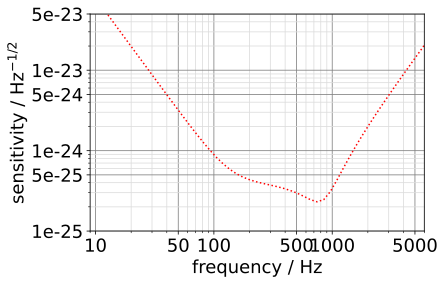

In [2]:
# recovers Li+2020 Fig. 5 (also see comparison in Mathematica notebook to actual Li model)
liIFO = IFO(2e-6, 4e3, None, 3e6, None, 0.046, 200, 2 * pi * 5000, 2 * pi * 500, 0)
lossless = (0,0,0,0)
# aLIGO = IFO(1064e-9, 4e3, 56, 750e3, 0.014, 0.325, 40, None, None, 0)
# Voyager = IFO(2e-6, 4e3, 56, 3e6, 0.002, 0.046, 200, None, None, 0)

freq_tuple1 = (10, 6e3, 50)
f_List = np.geomspace(
    freq_tuple1[0], freq_tuple1[1], num=freq_tuple1[2]
)

plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots()

# ax.loglog(
#     f_List,
#    liIFO.sensList_vs_freq([0, *lossless, *signalRO], freq_tuple1), 'k'
# )
ax.loglog(
    f_List,
   liIFO.sensList_vs_freq([4.93/5, *lossless, *signalRO], freq_tuple1), 'r', linestyle='dotted'
)
ax.set_xlim((9, 6e3))
ax.set_ylim((1e-25, 5e-23))
ax.grid('both', 'both', color='gainsboro')

ax.set_yticks((1e-25, 5e-25, 1e-24, 5e-24, 1e-23, 5e-23), labels=(1e-25, 5e-25, 1e-24, 5e-24, 1e-23, 5e-23))
for gridline in ax.yaxis.get_gridlines():
    gridline.set_color("grey")
ax.set_xticks((10, 50, 100, 500, 1000, 5000), labels=(10, 50, 100, 500, 1000, 5000))
for gridline in ax.xaxis.get_gridlines():
    gridline.set_color("grey")

ax.set_xlabel("frequency / Hz")
ax.set_ylabel("sensitivity / $\mathrm{Hz}^{-1/2}$")
fig.savefig('comparison_to_literature/Li+2020_Fig5.pdf', bbox_inches='tight')
plt.show()

#### Li+2021 Fig 3

----------------------
lambda0   =1.064e-06m,
L_arm     =4.0km,
L_SRC     =40.0m,
P_circ    =8.0e+05W,
T_ITM     =0.005,
T_SRM_b   =0.02,
T_SRM_c   =0,
M         =40kg,
ws/(2pi)  =4.220kHz,
gbR/(2pi) =6.029kHz,
gcR/(2pi) =0.000kHz,
fFSR,arm  =37.500kHz
----------------------
Threshold: 26516.504294495535, omega_s: 26516.50429449553


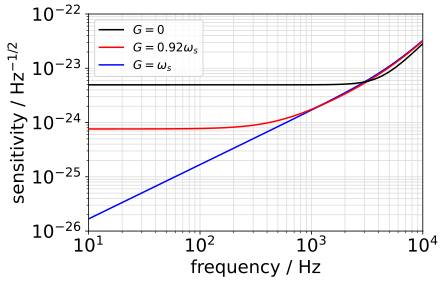

In [3]:
# Li+2021 Fig. 3, recovers by eye which implies that the two Li papers agree with each other and that any state alphas use 
# test mass mass isn't given, but only plotting shot noise--limited sensitivity
ifo = IFO(lambda0=1064e-9, L_arm=4e3, L_SRC=40, P_circ=800e3, T_ITM=0.005, T_SRM=0.02, M=40, ws=None, gbR=None, gcR=0)
ifo.print_params()
lossless = (0,0,0,0)

freq_tuple1 = (10, 1e4, 50)
f_List = np.geomspace(
    freq_tuple1[0], freq_tuple1[1], num=freq_tuple1[2]
)

plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots()

print(f'Threshold: {ifo.singularity_thr(*lossless[:-1])}, omega_s: {ifo.ws}')
ax.loglog(
    f_List,
    ifo.sensList_vs_freq([0, *lossless, *signalRO], freq_tuple1, radiation_pressure_on=False), 'k', label='$G=0$', zorder=4
)
ax.loglog(
    f_List,
    ifo.sensList_vs_freq([0.92, *lossless, *signalRO], freq_tuple1, radiation_pressure_on=False), 'r', label='$G=0.92\omega_s$', zorder=3
)
ax.loglog(
    f_List,
    ifo.sensList_vs_freq([1, *lossless, *signalRO], freq_tuple1, radiation_pressure_on=False), 'b', label='$G=\omega_s$', zorder=2
)
ax.legend(fontsize=12)
ax.set_xlim(freq_tuple1[:-1])
ax.set_ylim((1e-26, 1e-22))
ax.grid('both', 'both', color='gainsboro')

ax.set_xlabel("frequency / Hz")
ax.set_ylabel("sensitivity / $\mathrm{Hz}^{-1/2}$")
fig.savefig('comparison_to_literature/Li+2021_Fig3.pdf', bbox_inches='tight')
plt.show()

#### Adya+2020 Fig 3

----------------------
lambda0   =1.064e-06m,
L_arm     =4.0km,
L_SRC     =53.0m,
P_circ    =7.5e+05W,
T_ITM     =0.014,
T_SRM_b   =0.325,
T_SRM_c   =0,
M         =40kg,
ws/(2pi)  =6.135kHz,
gbR/(2pi) =88.521kHz,
gcR/(2pi) =0.000kHz,
fFSR,arm  =37.500kHz
----------------------
----------------------
lambda0   =1.064e-06m,
L_arm     =4.0km,
L_SRC     =319.0m,
P_circ    =7.5e+05W,
T_ITM     =0.014,
T_SRM_b   =0.12,
T_SRM_c   =0,
M         =40kg,
ws/(2pi)  =2.501kHz,
gbR/(2pi) =4.783kHz,
gcR/(2pi) =0.000kHz,
fFSR,arm  =37.500kHz
----------------------


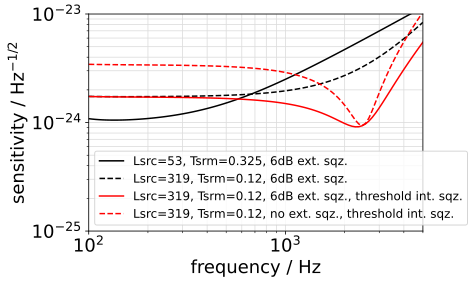

In [4]:
# Fig 3 from Adya+2020
# LF response doesn't match, is the test mass mass wrong? because of other comparisons matching, I suspect that Adya+2020 isn't using 40 kg

# From a Finesse model (input_power_in_Finesse.ipynb in aliveKat): (losses are low)
# --------------------
# Adya+2020.
# ITM transmission, Titm: 0.014
# Input power, Pin: 40.4 W
# Power incident on beamsplitter: 5.3 kW <--- from Table 1
# Power transmitted from beamsplitter towards X-arm: 2.65 kW
# Circulating arm cavity power, Pcirc: 0.752 MW --> use 750e3?
# {'loss_arm': 0, 'loss_srm': 3.5e-05, 'lsrc': 53, 'pin': 40.35, 't_srm': 0.325}
# check if ws is 6.13 kHz --> is 6.135, close enough?
ifo = IFO(lambda0=1064e-9, L_arm=4e3, L_SRC=53, P_circ=750e3, T_ITM=0.014, T_SRM=0.325, M=40, ws=None, gbR=None, gcR=0)
ifo.print_params()
# gives ws of 2.501 kHz, close enough
long_SRC_ifo = IFO(lambda0=1064e-9, L_arm=4e3, L_SRC=319, P_circ=750e3, T_ITM=0.014, T_SRM=0.12, M=40, ws=None, gbR=None, gcR=0)
long_SRC_ifo.print_params()

losses1 = (0, 35e-6, 0, 0.5e-2)
extSqzFactor1 = extSqzFactor_given_dB_reduction(-6)

freq_tuple1 = (1e2, 5000, 100)
f_List = np.geomspace(
    freq_tuple1[0], freq_tuple1[1], num=freq_tuple1[2]
)

plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots()

ax.loglog(
    f_List,
    ifo.sensList_vs_freq([0, *losses1, *signalRO], freq_tuple1, extSqzFactor=extSqzFactor1), color='k', label='Lsrc=53, Tsrm=0.325, 6dB ext. sqz.'
)

ax.loglog(
    f_List,
    long_SRC_ifo.sensList_vs_freq([0, *losses1, *signalRO], freq_tuple1, extSqzFactor=extSqzFactor1), color='k', linestyle='--', label='Lsrc=319, Tsrm=0.12, 6dB ext. sqz.'
)

fmt_List = ['r', 'r--']
label_List = [
    'Lsrc=319, Tsrm=0.12, 6dB ext. sqz., threshold int. sqz.',
    'Lsrc=319, Tsrm=0.12, no ext. sqz., threshold int. sqz.'
]
extSqzFactor_List = [extSqzFactor1, 1]
for i, extSqzFactor in enumerate(extSqzFactor_List):
    # Table 1 says x=0.065 (units?) but the readout rate is 4.783kHz, near threshold looks correct
    # Adya+2020 doesn't know lossy threshold, so could also try the lossless threshold in the lossy case : TODO
    ax.loglog(
        f_List,
        parallel_map(lambda f : long_SRC_ifo.dIS_ASDSh(f, 1, *losses1[:2], losses1[-1], pi/2, extSqzFactor=extSqzFactor), f_List),
        fmt_List[i],
        label=label_List[i]
    )

ax.legend(fontsize=12)
ax.set_xlim(freq_tuple1[:-1])
ax.set_ylim((1e-25, 1e-23))
ax.grid('both', 'both', color='gainsboro')
ax.set_xlabel("frequency / Hz")
ax.set_ylabel("sensitivity / $\mathrm{Hz}^{-1/2}$")
fig.savefig('comparison_to_literature/Adya+2020_Fig3.pdf', bbox_inches='tight')
plt.show()

#### Adya+2020 Fig 2

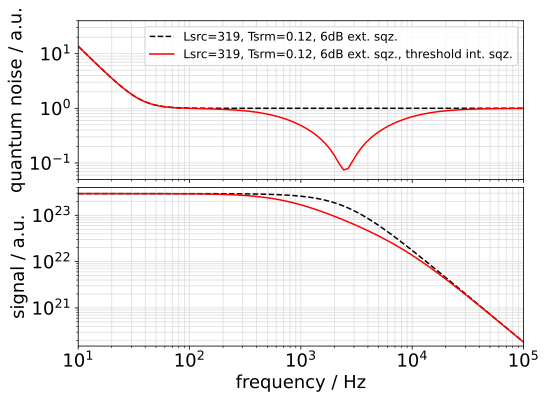

In [5]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw=dict(hspace=0.05), figsize=(8, 6))

freq_tuple1 = (1e1, 1e5, 100)
f_List = np.geomspace(
    freq_tuple1[0], freq_tuple1[1], num=freq_tuple1[2]
)

axs[0].loglog(
    f_List, parallel_map(lambda f : long_SRC_ifo.dIS_ASDSx(f, 0, *losses1[:2], losses1[-1], pi/2, extSqzFactor=extSqzFactor), f_List), 'k--', label='Lsrc=319, Tsrm=0.12, 6dB ext. sqz.'
)
axs[0].loglog(
    f_List, parallel_map(lambda f : long_SRC_ifo.dIS_ASDSx(f, 1, *losses1[:2], losses1[-1], pi/2, extSqzFactor=extSqzFactor), f_List), 'r', label='Lsrc=319, Tsrm=0.12, 6dB ext. sqz., threshold int. sqz.'
)
axs[1].loglog(
    f_List, parallel_map(lambda f : long_SRC_ifo.dIS_sigTabs(f, 0, *losses1[:2], losses1[-1], pi/2, extSqzFactor=extSqzFactor), f_List), 'k--'
)
axs[1].loglog(
    f_List, parallel_map(lambda f : long_SRC_ifo.dIS_sigTabs(f, 1, *losses1[:2], losses1[-1], pi/2, extSqzFactor=extSqzFactor), f_List), 'r'
)

axs[0].legend(fontsize=12)
axs[0].grid('both', 'both', color='gainsboro')
axs[1].grid('both', 'both', color='gainsboro')
axs[0].set_ylabel("quantum noise / a.u.")
axs[1].set_ylabel("signal / a.u.")
axs[1].set_xlabel("frequency / Hz")
axs[0].set_ylim((5e-2, 40))
axs[1].set_ylim((1.5e20, 4e23))
axs[1].set_xlim(freq_tuple1[:-1])
fig.savefig('comparison_to_literature/Adya+2020_Fig2.pdf', bbox_inches='tight')
plt.show()

#### Korobko+2019 Fig 3

----------------------
lambda0   =1.550e-06m,
L_arm     =20.0km,
L_SRC     =56.0m,
P_circ    =4.0e+06W,
T_ITM     =0.07,
T_SRM_b   =0.35,
T_SRM_c   =0,
M         =200kg,
ws/(2pi)  =5.968kHz,
gbR/(2pi) =91.823kHz,
gcR/(2pi) =0.000kHz,
fFSR,arm  =7.500kHz
----------------------
Sloshing frequency does not match paper: 5968.310365946076 = 1/(2*pi)*c*sqrt(0.07/(4*56*20e3))


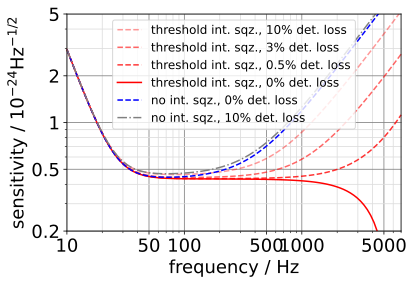

In [6]:
# Korobko+2019, Fig. 3
# plots without squeezing match indicating that alpha is correct; plots without squeezing do not agree on the sloshing frequency (and readout rate) indicating that likely the Lsrm (and/or Tsrm) is different than stated in Korobko
korobko_ifo = IFO(lambda0=1550e-9, L_arm=20e3, L_SRC=56, P_circ=4e6, T_ITM=0.07, T_SRM=0.35, M=200, ws=None, gbR=None, gcR=0)
# ws is wrong, calculated here as ~6 kHz but shown as ~3 kHz, why?
korobko_ifo.print_params()
ws = 1/(2*pi)*c*sqrt(korobko_ifo.T_ITM/(4*korobko_ifo.L_SRC*korobko_ifo.L_arm))
assert ws == 1/(2*pi)*c*sqrt(0.07/(4*56*20e3))
print(f'Sloshing frequency does not match paper: {ws} = 1/(2*pi)*c*sqrt(0.07/(4*56*20e3))')
extSqzFactor1 = extSqzFactor_given_dB_reduction(0)

freq_tuple1 = (10, 7e3, 100)
f_List = np.geomspace(
    freq_tuple1[0], freq_tuple1[1], num=freq_tuple1[2]
)

plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots()


colour_List = [(1, 0, 0, 0.4), (1, 0, 0, 0.6), (1, 0, 0, 0.8), (1, 0, 0, 1), 'b', 'grey']
label_List = ["threshold int. sqz., 10% det. loss", "threshold int. sqz., 3% det. loss", "threshold int. sqz., 0.5% det. loss", "threshold int. sqz., 0% det. loss", "no int. sqz., 0% det. loss", "no int. sqz., 10% det. loss"]
linestyle_List = ['--', '--', '--', '-', '--', '-.']
params_List = [
    [1, 0, 0, 0.1, pi / 2],
    [1, 0, 0, 0.03, pi / 2],
    [1, 0, 0, 0.005, pi / 2],
    [1, 0, 0, 0, pi / 2],
    [0, 0, 0, 0, pi / 2],
    [0, 0, 0, 0.1, pi / 2],
]
for i, params in enumerate(params_List):
    ax.loglog(
        f_List,
        parallel_map(lambda f : 1e24*korobko_ifo.dIS_ASDSh(f, *params, extSqzFactor=extSqzFactor), f_List),
        color=colour_List[i],
        label=label_List[i],
        linestyle=linestyle_List[i]
    )

ax.legend(fontsize=12) #, title="dIS, detection loss / %", title_fontsize=12)
ax.set_xlim(freq_tuple1[:-1])
ax.set_ylim((0.2, 5))
ax.grid('both', 'both', color='gainsboro')
ax.set_xlabel("frequency / Hz")
ax.set_ylabel("sensitivity / $10^{-24}\mathrm{Hz}^{-1/2}$")
ax.set_yticks((0.2, 0.5, 1, 2, 5), labels=(0.2, 0.5, 1, 2, 5))
for gridline in ax.yaxis.get_gridlines():
    gridline.set_color("grey")
ax.set_xticks((10, 50, 100, 500, 1000, 5000), labels=(10, 50, 100, 500, 1000, 5000))
for gridline in ax.xaxis.get_gridlines():
    gridline.set_color("grey")
fig.savefig('comparison_to_literature/Korobko+2019_Fig3.pdf', bbox_inches='tight')
plt.show()

#### LIGO and LIGO Voyager
Where are these curves?

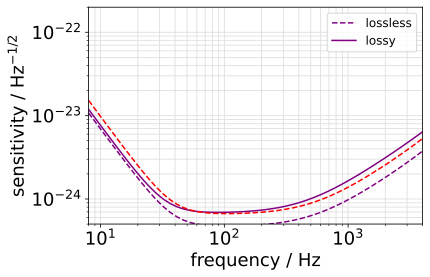

In [11]:
# Voyager, Adhikari+2020 Fig 10 (or purple line in 2), parameters in Table 1
# given the agreement with other parts of the literature, I expect that the current discrepancy is down to optical loss (circulating power is set but disagrees with given input power meaning that loss is present)
# Pin = 152 W in legend, TODO: check this against Finesse, need to know losses because lossless does not match powers from Table 1: 152 W input, 3100 W (3.1 kW) in PRC, 3 MW in arms
# pg. 32 says "To achieve 5% injection loss and 5%, readout loss, as currently assumed in the LIGO Voyager baseline curve", therefore Rpd = 5e-2
# --------------------
# Adhikari+2020.
# ITM transmission, Titm: 0.002
# Input power, Pin: 152 W
# Power incident on beamsplitter: 12.1 kW
# Power transmitted from beamsplitter towards X-arm: 6.05 kW
# Circulating arm cavity power, Pcirc: 12.1 MW
# {'loss_arm': 0,
#  'loss_srm': 0,
#  'lsrc': 56,
#  'pin': 152,
#  't_prm': 0.049,
#  't_srm': 0.046,
#  'titm': 0.002}

ifo = IFO(lambda0=2000e-9, L_arm=4e3, L_SRC=56, P_circ=3e6, T_ITM=2e-3, T_SRM=4.6e-2, M=200, ws=None, gbR=None, gcR=0)
extSqzFactor = 1/10

freq_tuple1 = (8, 4000, 50)
f_List = np.geomspace(
    freq_tuple1[0], freq_tuple1[1], num=freq_tuple1[2]
)

plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots()

ax.loglog(
    f_List,
    np.array(ifo.sensList_vs_freq([0, *lossless, *signalRO], freq_tuple1, extSqzFactor=extSqzFactor)), color='purple', linestyle='--', label='lossless'
)
ax.loglog(
    f_List,
    np.array(ifo.sensList_vs_freq([0, *losses0, *signalRO], freq_tuple1, extSqzFactor=extSqzFactor)), color='purple', label='lossy'
)
ax.legend(fontsize=12)
ax.set_ylim((5e-25, 2e-22))
ax.set_xlim(*freq_tuple1[:2])
ax.grid('both', 'both', color='gainsboro')

ax.set_xlabel("frequency / Hz")
ax.set_ylabel("sensitivity / $\mathrm{Hz}^{-1/2}$")
plt.show()

In [ ]:
# aLIGO
ifo = IFO(lambda0=1064e-9, L_arm=4e3, L_SRC=56, P_circ=750e3, T_ITM=0.014, T_SRM=0.325, M=40, ws=None, gbR=None, gcR=0)